In [56]:
from gradio_client import Client, handle_file
import numpy as np
import shutil
from IPython.display import Image
import PIL.Image
import PIL.ImageEnhance
import PIL.ImageDraw
import PIL.ImageOps
import PIL.ImageFilter

client = Client("https://sana.hanlab.ai/")
def gen(id, prompt, seed, extra=', photographed in a dark room, watercolor masterpiece, Studio Ghibli style, simple shapes, flat shading', flip=False, transparent=False, black_transparent=False, alpha_mul=1, alpha_exp=1, **kwargs):
    prompt += extra
    cfg = dict(
            negative_prompt="",
            style="Fantasy art",
            use_negative_prompt=False,
            num_imgs=1,
            seed=seed,
            height=256,
            width=256,
            flow_dpms_guidance_scale=4.5,
            flow_dpms_pag_guidance_scale=1,
            flow_dpms_inference_steps=20,
            randomize_seed=False,
            api_name="/run",
    )
    cfg.update(kwargs)
    result = client.predict(
            prompt=prompt,
            **cfg,
    )
    path = result[0][0]['image']
    destination = f"public/images/generated/{id}.webp"
    if flip:
        img = PIL.Image.open(path)
        img = img.transpose(PIL.Image.FLIP_LEFT_RIGHT)
        img.save(path, format='webp')
    if transparent:
        img = PIL.Image.open(path).convert('RGBA')
        PIL.ImageDraw.floodfill(img, (10, 10), (0, 0, 0, 0), thresh=20*alpha_mul)
        img.save(path, format='webp')
    if black_transparent:
        img = PIL.Image.open(path).convert('RGB')
        rgb = np.array(img).astype(np.float32)
        # lum = (0.2126 * rgb[..., 0] + 0.7152 * rgb[..., 1] + 0.0722 * rgb[..., 2])
        lum = (rgb.sum(axis=-1)*alpha_mul)**alpha_exp
        alpha = np.clip(lum, 0, 255).astype(np.uint8)
        rgba = np.dstack((rgb.astype(np.uint8), alpha))
        img = PIL.Image.fromarray(rgba, mode='RGBA')
        img.save(path, format='webp')
    shutil.copy(path, destination)
    return Image(destination)
def creature(name, description, seed, **kwargs):
    cfg = {
        'extra': ', cute monster, black background, screenshot',
        'height': 512,
        'width': 512,
        'flow_dpms_inference_steps': 20,
    }
    cfg.update(kwargs)
    return gen(name, description, seed, **cfg)

Loaded as API: https://sana.hanlab.ai/ ✔


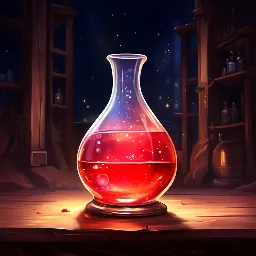

In [75]:
gen('Health Potion', 'A flask filled with a red liquid', 1)

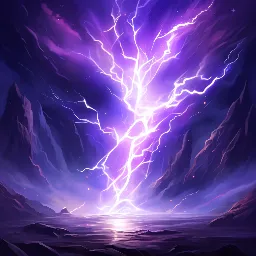

In [76]:
gen('Purple Spark', 'A purple lightning bolt', 1)

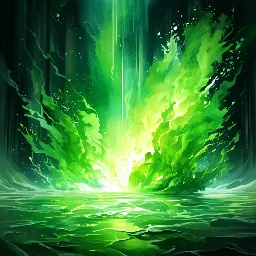

In [77]:
gen('Acid Bolt', 'a violent splash of green acid', 1)

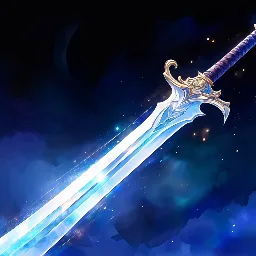

In [62]:
gen('Steel Jab', 'a sword swing, close up on the blade, high speed, silver background', 2)

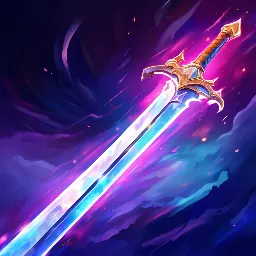

In [117]:
gen('Steel Jab+', 'a sword swing, close up on the blade, high speed, neon steel background', 2)

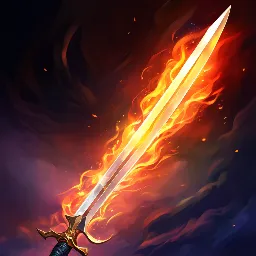

In [122]:
gen('Flame Jab+', 'a diagonal sword, close up on the blade, flame background', 2)

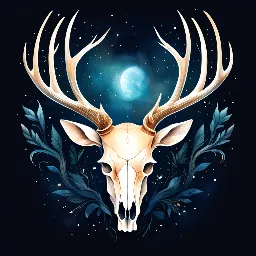

In [78]:
gen('Blessing of the Woods', 'a deer skull', 1)

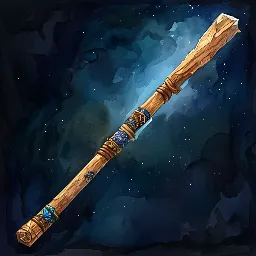

In [78]:
gen('Wooden Stick', 'a thick wooden fighting stick with talismans', 3)

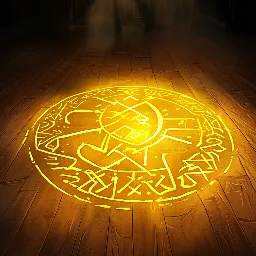

In [154]:
gen('Enscribe', 'nordic runes painted in yellow on the floor, close up', 8)

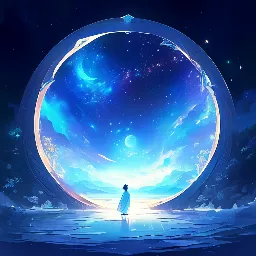

In [113]:
gen('Lunar Portal', 'a circular portal to a nightscape', 5)

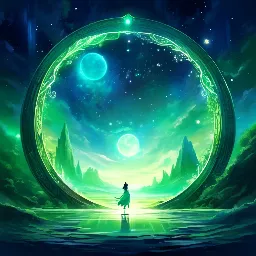

In [3]:
gen('online', 'a circular portal to a green and blue nightscape', 5)

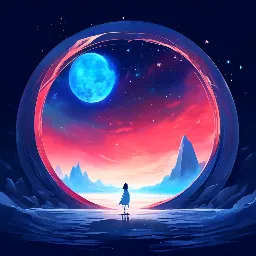

In [6]:
gen('offline', 'a circular portal to a red and blue nightscape', 5)

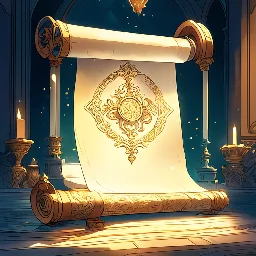

In [17]:
gen('copy-link', 'a scroll with the seal of the king', 4)

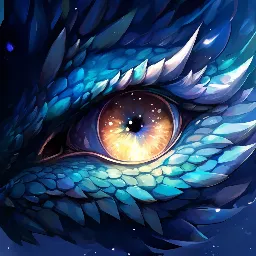

In [5]:
gen('blur-images', 'an extreme close up of an eye of a dragon', 5)

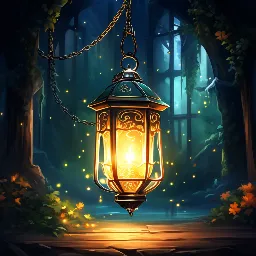

In [24]:
gen('Illuminate', 'a glowing lantern hanging from a chain', 1)

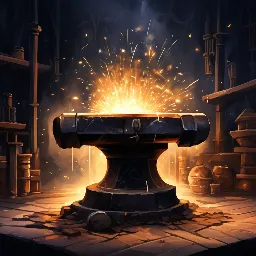

In [44]:
gen('Forge', "a blacksmith's anvil, sparks", 6)

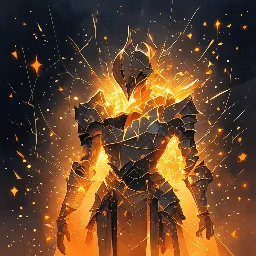

In [36]:
gen('Unforge', "an armor cracked in two, orange sparks", 6)

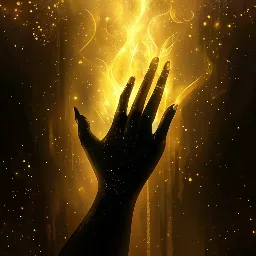

In [326]:
gen('Snatch', "a black hand, gold light", 6)

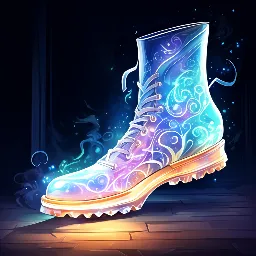

In [161]:
gen('Running Start', "an electrified shoe", 1)

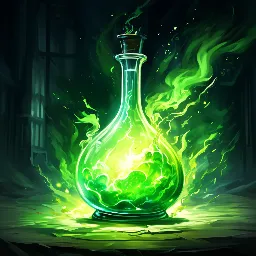

In [165]:
gen('Poison Strike', "an exploding flask of green poison", 1)

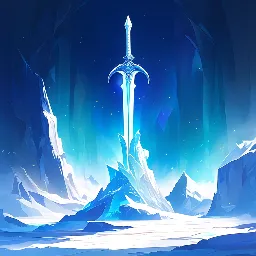

In [134]:
gen('Glacial Strike', "a glacier shaped like a sword", 4)

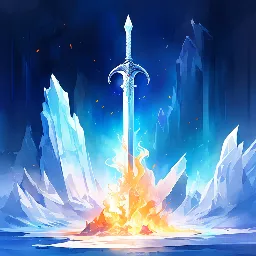

In [341]:
gen('Glacial Flame Strike', "a glacier shaped like a sword, on fire", 4)

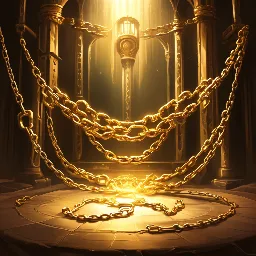

In [52]:
gen('Capture', "golden manacles", 1)

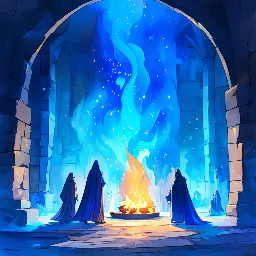

In [ ]:
gen('Fall Back to Camp', "Hooded figures stand around a small flickering fireplace in a dungeon. Blue light.", 4)

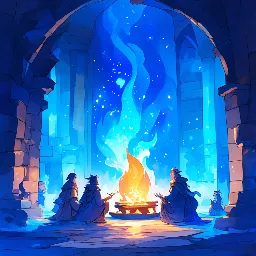

In [240]:
gen('camp', "Packs around a small flickering fireplace in a dungeon. Blue light.", 4)

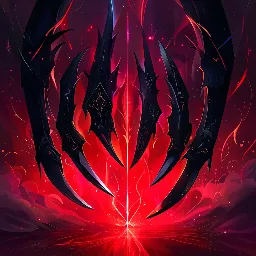

In [497]:
gen("Claws & Thorns", "black claws and blades, magical red light storm, symmetrical", 4)

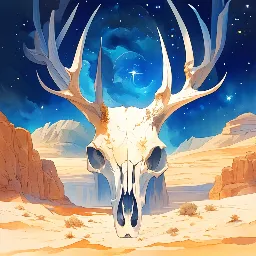

In [21]:
gen('Blessing of the Desert', "a gazelle skull, desert", 3)

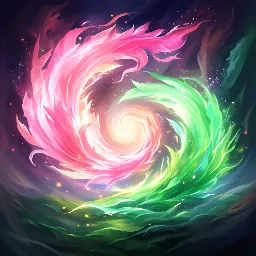

In [75]:
gen('Fused Skill', "a pink and a green fireball swirling together, spiral", 1)

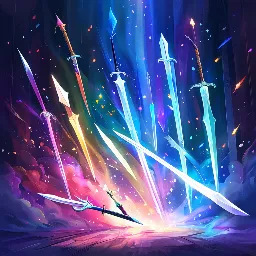

In [16]:
gen('Battle Rhythm', "colored daggers flying through the air", 4)

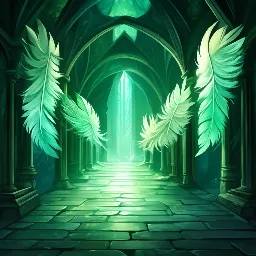

In [491]:
gen('Sneak Past', "feathers in a dungeon corridor, green light", 1)

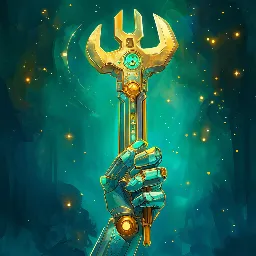

In [224]:
gen('Construct Factory', "a wrench held in a robotic hand, teal and gold light", 2)

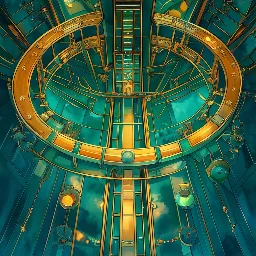

In [218]:
gen('Produce Turtle', "conveyor belt, machines, overhead view, teal and gold light, symmetry", 2)

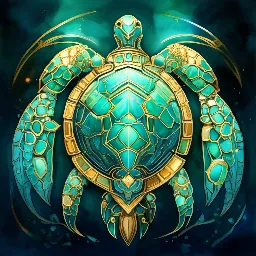

In [219]:
gen('Build Deployer', "mechanical turtle, teal and gold light, symmetry", 2)

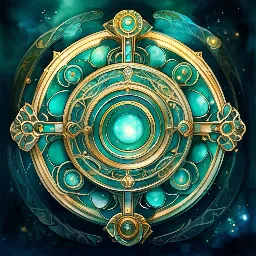

In [276]:
gen('Deploy Grower', "metal bearings, teal and gold light, symmetry", 2)

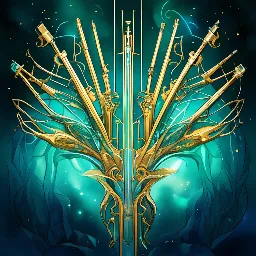

In [242]:
gen('Grow Gun', "a branching structure of rifles, teal and gold light, symmetry", 2)

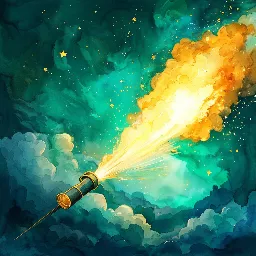

In [302]:
gen('Fire Xaranthian Gun', "cannon firing, teal and gold light", 2)

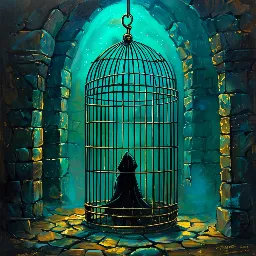

In [175]:
gen("rescue-locked", "An iron cage in the dungeon. Iron bars. A small black hooded figure in the iron cage. Acrylic painting. Darkness and gold and teal light. Black bars. Stonework.", 3, extra='')

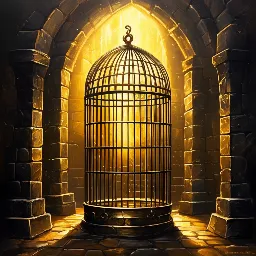

In [230]:
gen("rescue-unlock", "An iron cage in the dungeon. Iron bars. Acrylic painting. Radiant gold light. Black bars. Stonework.", 3, extra='')

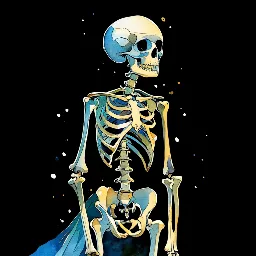

In [ ]:
gen('Animated Skeleton', 'a weak unarmored skeleton standing up, black background', 7)

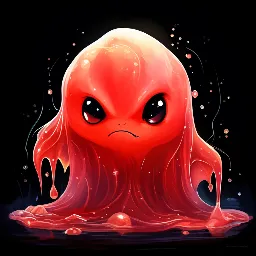

In [11]:
gen('Wild Slime', 'a translucent red slime creature with angry eyes, black background', 3)

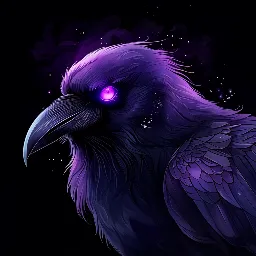

In [40]:
gen('Poison Crow', 'a crow with glowing purple eyes, black background', 3)

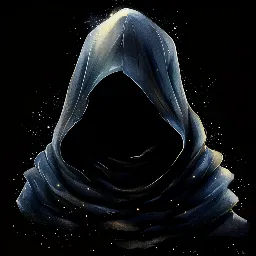

In [115]:
gen('The Shroud', 'a hooded figure, face concealed in darkness, black background', 1)

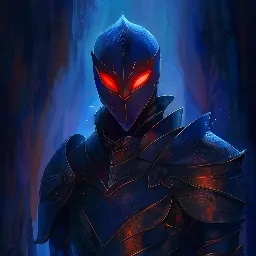

In [133]:
gen('Dark Lord', 'an armored man concealed in darkness, two glowing red eyes', 7)

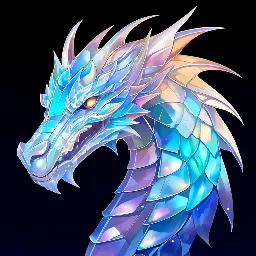

In [139]:
gen('Glass Dragon', 'the head of a dragon made of translucent glass, mirror scales', 2)

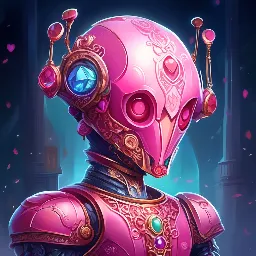

In [68]:
gen('Xaranthian Construct', 'a scary pink robot with an engraved heart on its head, jewel decorations', 5, use_negative_prompt=True, negative_prompt='human, woman, girl')

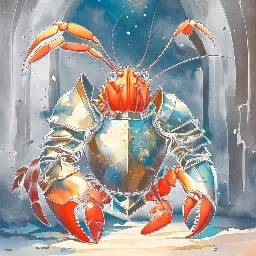

In [8]:
gen('Lobster Daddy', "a lobster in knight's armor", 4)

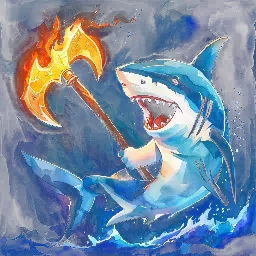

In [ ]:
gen('Jaw Maw Maw', "a shark wielding a flaming battle axe", 2)

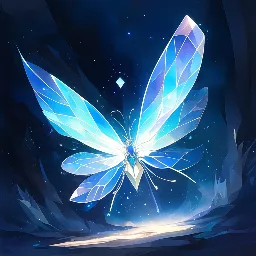

In [113]:
gen('Will-o-Wasp', "a glowing diamond with insect wings flies in the darkness", 4)

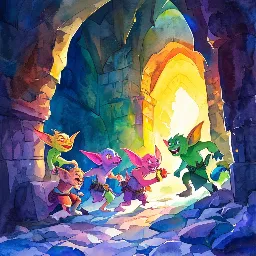

In [142]:
gen('Bandlings', "a band of colorful goblins attacks in a dungeon", 2)

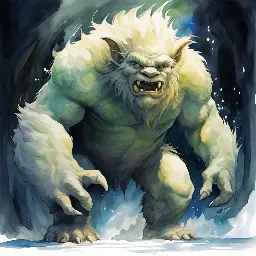

In [92]:
gen('Trollish Maiden', "a big ugly troll attacking", 2)

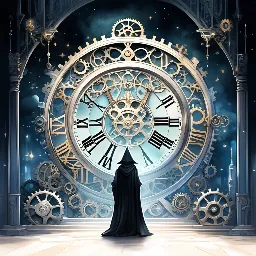

In [24]:
gen('Clockomancer', "a wizard stands in front of silver clockworks, gears, hall, black", 10)

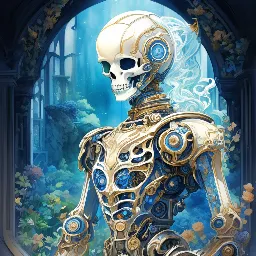

In [123]:
gen('Skeletron', "a robotic skeleton", 1)

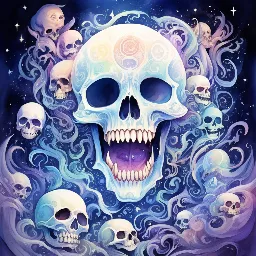

In [393]:
gen('Skelemasterion', "magical cosmic skeleton with many skulls and sharp teeth", 1)

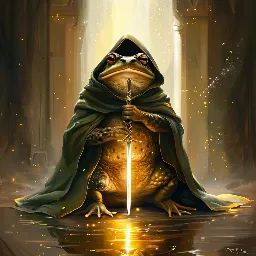

In [304]:
gen('Frog Assassin', "a toad in a hooded cloak, light reflecting on a dagger", 1)

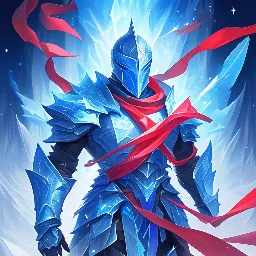

In [25]:
gen('Frozen Centurion', "A warrior armored in ice. A red ribbon winds across his armor.", 1)

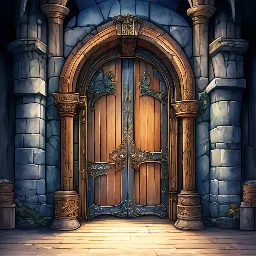

In [65]:
gen('Thick Door', "a symmetrical fortified wooden door in a dungeon", 1)

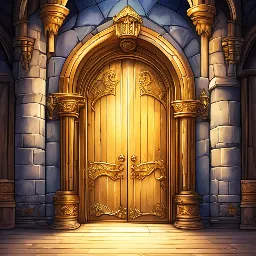

In [67]:
gen("Fortified Door", "a golden fortified wooden door in a castle", 1)

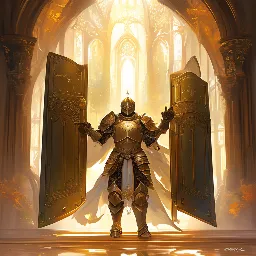

In [80]:
gen("Master of Doors", "A warrior in heavy plate armor carrying doors that are rounded. Hands raised.", 1)

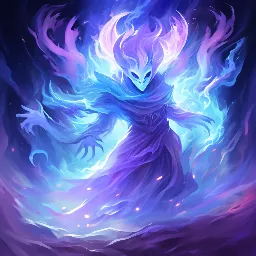

In [71]:
gen('Zakatrixos', "A scary ghost with the face of a dmeon in combat, blue and purple lights.", 1)

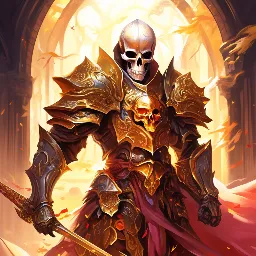

In [170]:
gen('Dead Gladiator', "A scary undead knight in combat, naked skull, ruby and gold scales.", 1)

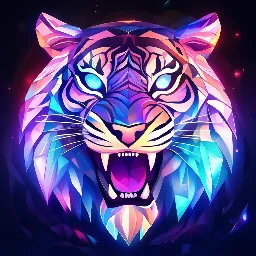

In [165]:
gen('Striped Horror', "A faceted crystal statue of an angry tiger, colored lights, close up, teeth.", 2)

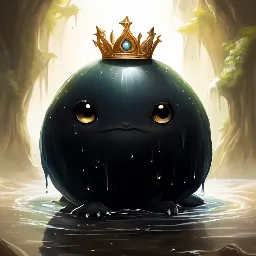

In [169]:
gen('King of Tadpoles', "A wet round black blob creature wearing a crown.", 1)

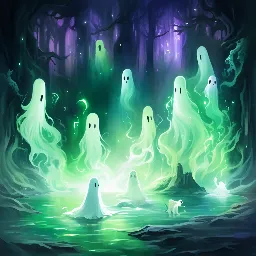

In [76]:
gen('Skyrmions', "ghosts, green and purple lights, dogs", 1)

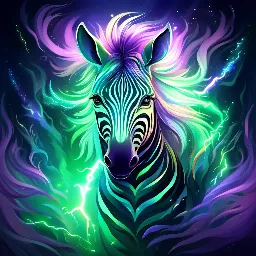

In [78]:
gen('Tenebra', "wild zebra, green and purple lights, lightning, symmetry", 1)

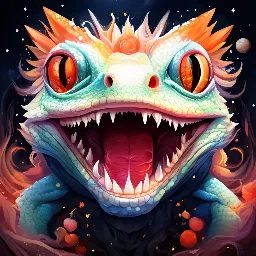

In [79]:
gen('Geckalog', "gecko with huge teeth, blood, symmetry", 1)

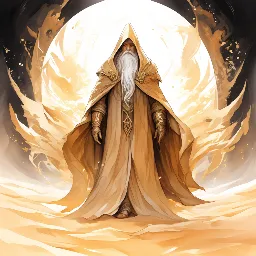

In [82]:
gen('Landas Wizard', "a wizard covered in sand, symmetry", 1)

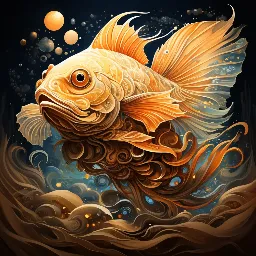

In [ ]:
gen('Dryfin Carp', "a catfish made of sand, symmetry", 1)

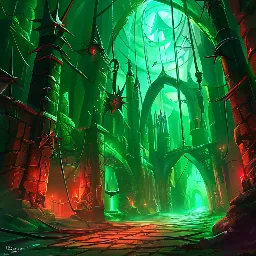

In [109]:
gen('Defensive Installation', "traps, giant swinging blades, halberds, spike pits, spiked walls, wires, a dungeon corridor, green and red light, danger, close up", 4, extra='')

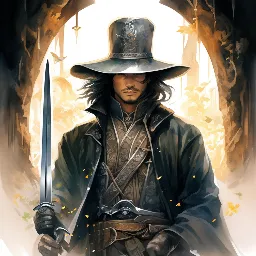

In [113]:
gen('Artifact Seeker', "a man in a steel hat, daggers, knives", 1)

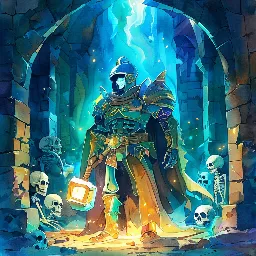

In [127]:
gen('Sullen Bearer', "a man in a heavy helmet, glowing hammer, skeletons, dark dungeon", 4)

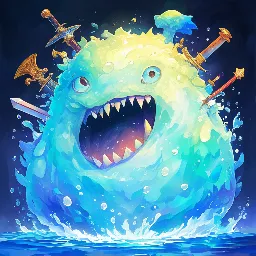

In [134]:
gen('Lost Swimmer', "a blob monster with a body made of water, swords, weapons, rage, mouth, teeth", 2)

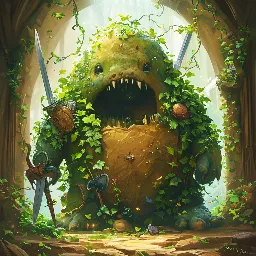

In [146]:
gen('Potato Golem', "a blob monster with a body made of earth, swords, shields, ivy, rage, mouth, teeth", 1)

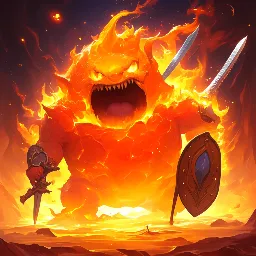

In [ ]:
gen('Core Diver', "a blob monster with a body made of lava, swords, shields, rage, mouth", 1)

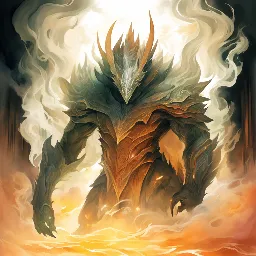

In [154]:
gen('Smother Mother', "a monster with a body made of smoke, swords, shields, rage, mouth, dark dungeon", 1)

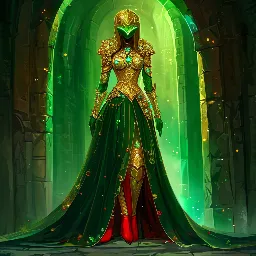

In [206]:
gen('Corrupted Bounty Hunter', "an armored woman with a body made of gold and jewels, dark dungeon, scary eyes, black lips, green light, long skirt, red shoes", 2)

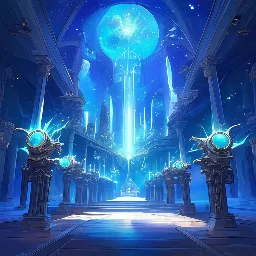

In [213]:
gen("Chago's Chamber", "a million electric cannons", 3)

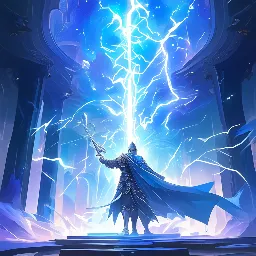

In [215]:
gen("Chago", "a knight controlling lightning", 3)

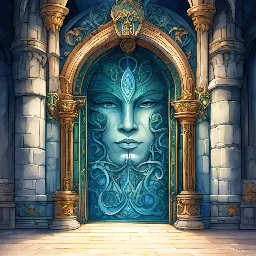

In [218]:
gen("Door of Loathing", "a door in a castle decorated with a giant face", 1)

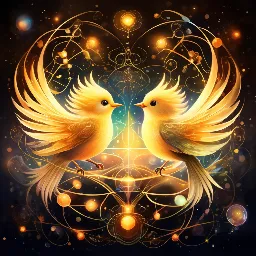

In [499]:
gen("Enantiomers", "two round birds with glowing eyes surrounded by chemistry molecules, symmetrical, magic, gold light", 2)

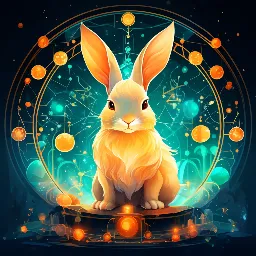

In [231]:
gen("Hopanoids", "a round golden rabbit statue surrounded by chemistry molecules, symmetrical, magic, teal and orange light", 2)

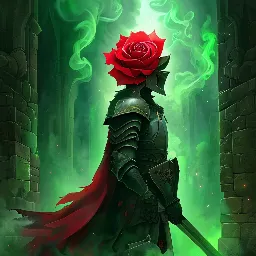

In [245]:
gen("Tosyl Rose", "a knight with a red helmet shaped like a rose, dark dungeon, stonework, green smoke", 6)

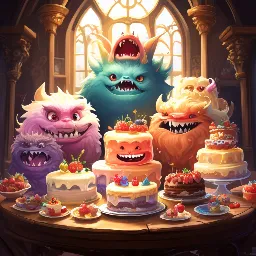

In [246]:
gen("Food Mimic", "A table set with cakes. Each cake is a monster with a large mouth and teeth.", 1)

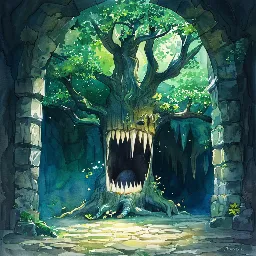

In [248]:
gen("Unwelcoming Glade", "A tree in a dark dungeon with mouth and teeth.", 1)

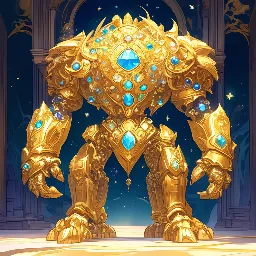

In [265]:
gen("The King's Armor", "A golem built from gold and decorated with gems.", 3)

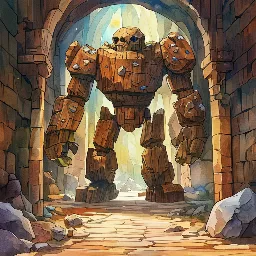

In [266]:
gen("Scaffold Sorcery", "A golem built from wood and decorated with rocks. Dungeon corridor.", 3)

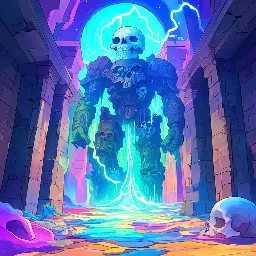

In [268]:
gen("Corridor of Illusions", "A golem built from slime and decorated with skulls. Dungeon corridor. Colorful lightning.", 3)

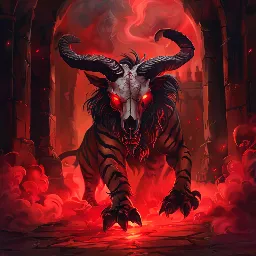

In [278]:
gen("The Final Warden", "A demon with a goat's skull for a head and tiger paws. Dark dungeon. Red smoke and torchlight.", 4)

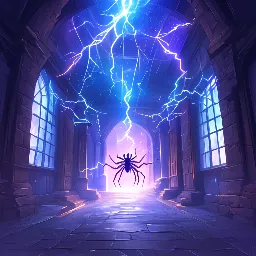

In [282]:
gen("Web of Power", "Colorful lightning. Dungeon corridor. A large spider.", 1)

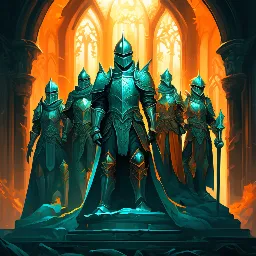

In [289]:
gen("Tombstone of the Forgotten", "A statue of a squad of knights in stone armor. Dark dungeon. Teal and orange light.", 1)

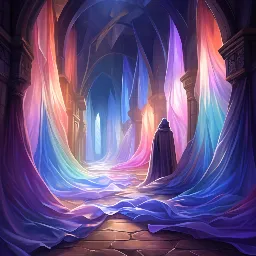

In [320]:
gen("Lior the Weaver", "A lot of rippling cloth sheets. Dungeon corridor. Colorful lighting. A wizard.", 1)

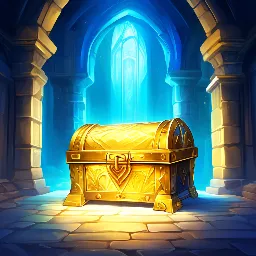

In [354]:
gen("Golden Chest", "A golden chest. Dungeon corridor. Blue and yellow light.", 1)

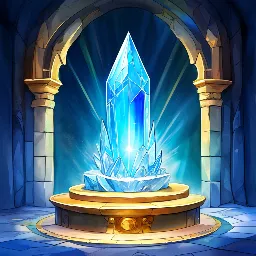

In [367]:
gen("Power Crystal", "A blue crystal on a golden pedestal stands in a room in a dungeon. It radiates a faint magical energy.", 2)

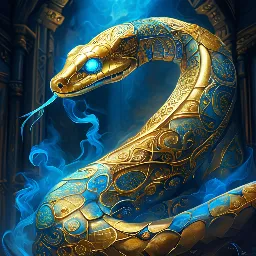

In [372]:
gen("Hiber Conduit", "A robotic snake made of gold and decorated with engravings. Dark dungeon. Blue smoke.", 1)

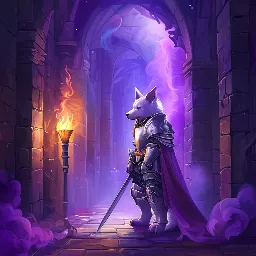

In [379]:
gen("Gnollish Ambassador", "A knight in silver armor with the head of a dog. Dungeon corridor. Torchlight. Purple smoke.", 3)

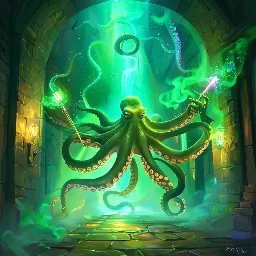

In [388]:
gen("Wands from the Depths", "An ancient octopus wielding glowing wands. Colorful lights. Green smoke. Dungeon corridor.", 1)

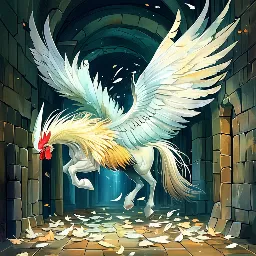

In [404]:
gen("Hippogryph", "A horse with feathers and wings. Feathers in the air. Feathers on the ground. The head of a rooster. Dungeon corridor. Dark background.", 3)

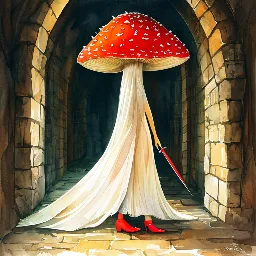

In [413]:
gen("Dragonfly Agaric", "A mushroom in the shape of a woman. Sword. Long flowing dress. Red shoes. Dungeon corridor. Dark background.", 1)

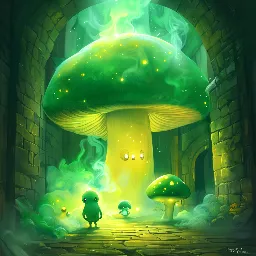

In [427]:
gen("Decay Manifest", "Big and small mushroom monsters with glowing yellow eyes in a dungeon corridor. Green smoke. One giant mushroom monster.", 1)

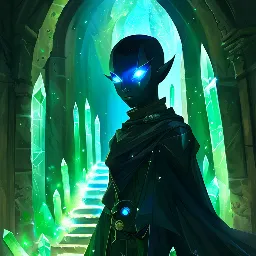

In [440]:
gen("Crystal Man", "Black humanoid with glowing blue eyes. Green crystals, lights. Dungeon corridor.", 1)

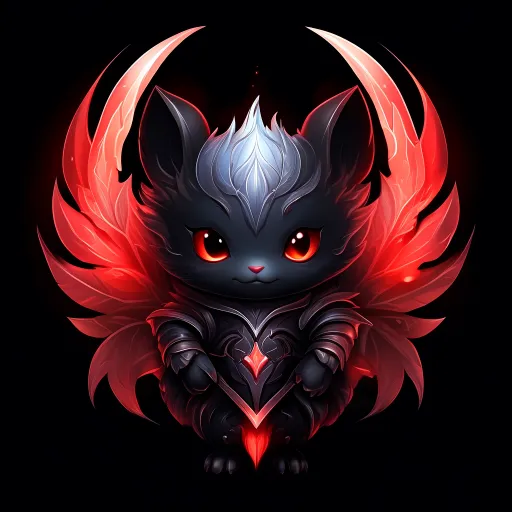

In [483]:
creature('Knight of Claws', 'a cute assassin monster, red blades, symmetrical', 2)

In [ ]:
creature('Knight of Claws', 'a cute monster with large sharp claws', 2)

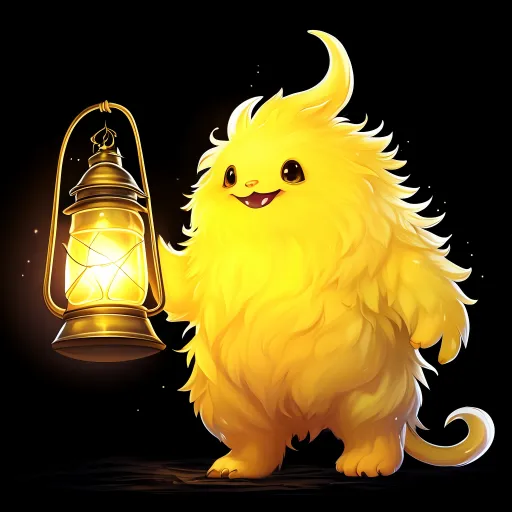

In [32]:
creature('Lamplighter', 'a cute yellow monster carrying a glowing lantern', 2)

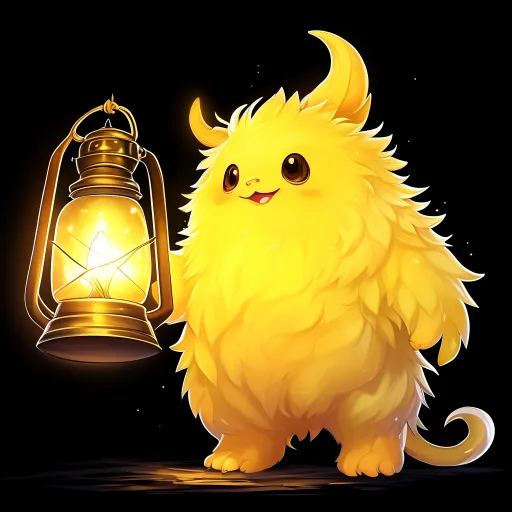

In [102]:
creature('Lamperlighter', 'a cute yellow monster carrying a big glowing lantern', 2)

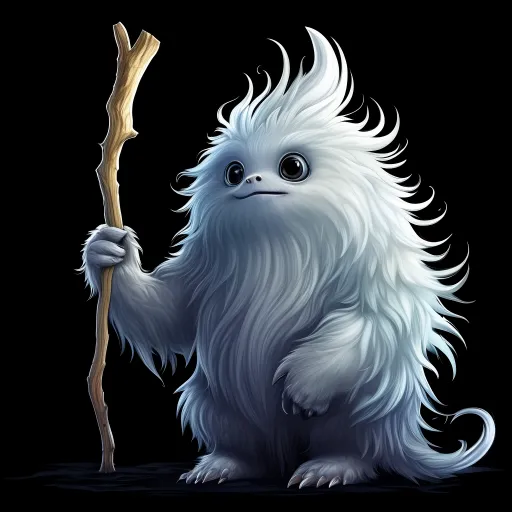

In [33]:
creature('Stick Master', 'a cute grey monster holding a stick', 2)

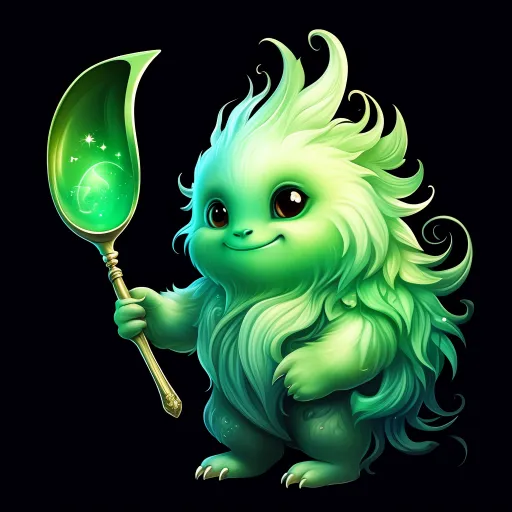

In [92]:
creature('Dark Chef', 'a cute monster holding a green ladle', 2)

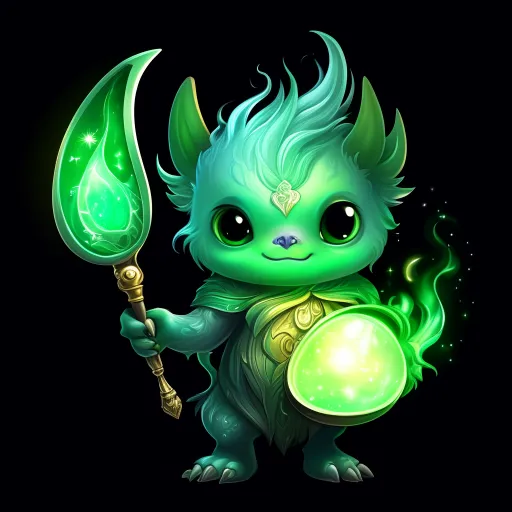

In [101]:
creature('Dark Sommelier', 'a monster holding a glowing green ladle', 2)

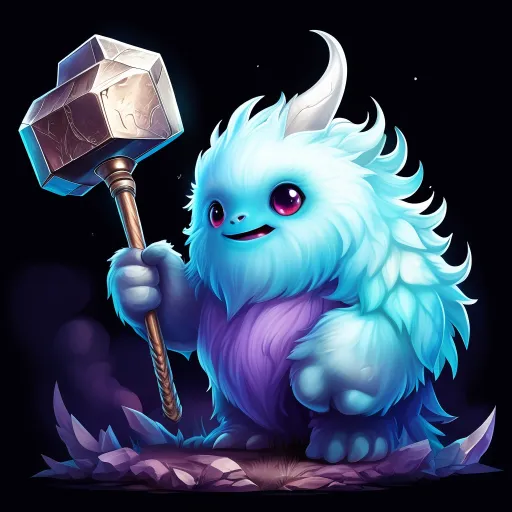

In [ ]:
creature('Anvilomancer', 'a cute monster holding a huge hammer', 2)

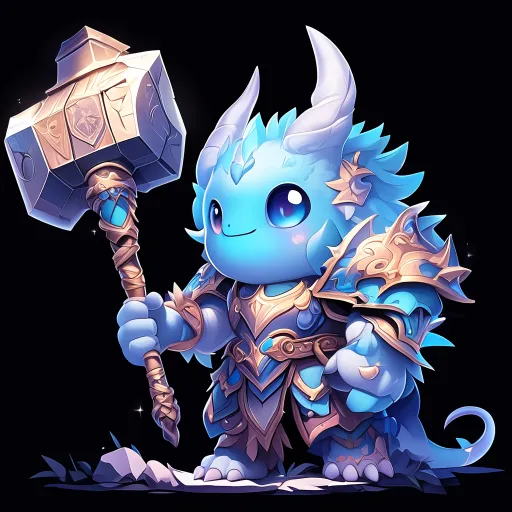

In [100]:
creature('Anvilominator', 'an cute armored monster holding a huge hammer', 2, flow_dpms_inference_steps=30)

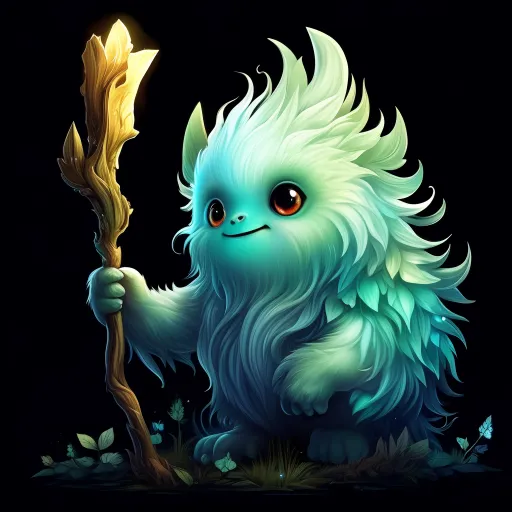

In [66]:
creature('Stick Grandmaster', 'a cute forest monster holding a stick', 2)

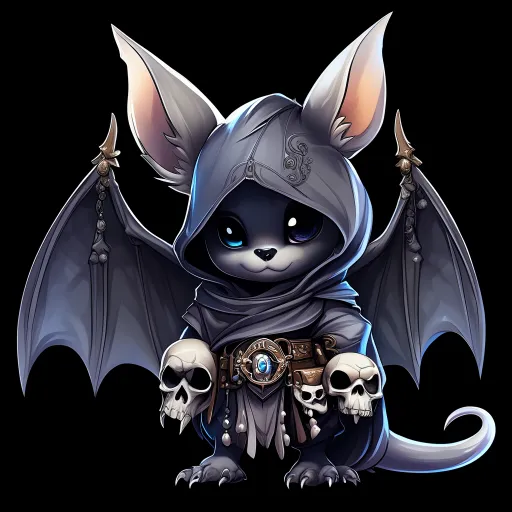

In [35]:
creature('Mongreler', 'a cute hooded bat monster with skulls and bones on its belt, side view', 2)

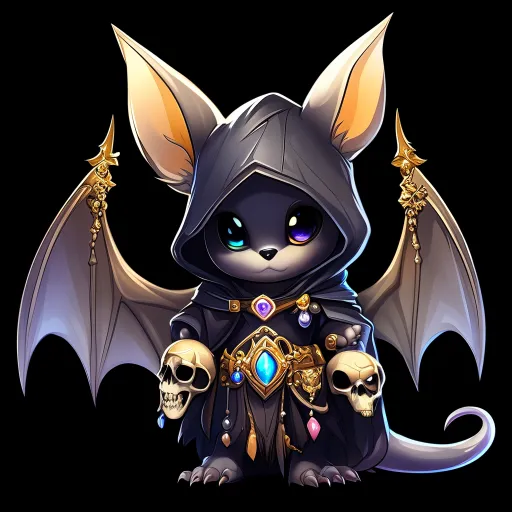

In [51]:
creature('Monster Juggler', 'a cute hooded bat monster necromancer with two golden skulls and gems on its belt, side view', 2)

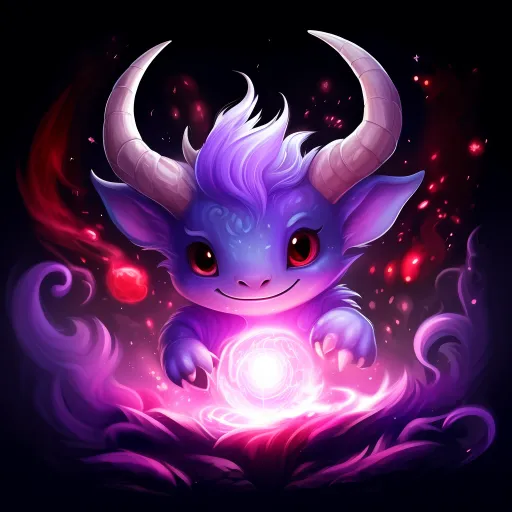

In [489]:
creature('Azrekta', 'a cute horned monster casting an explosive spell, purple and red', 2)

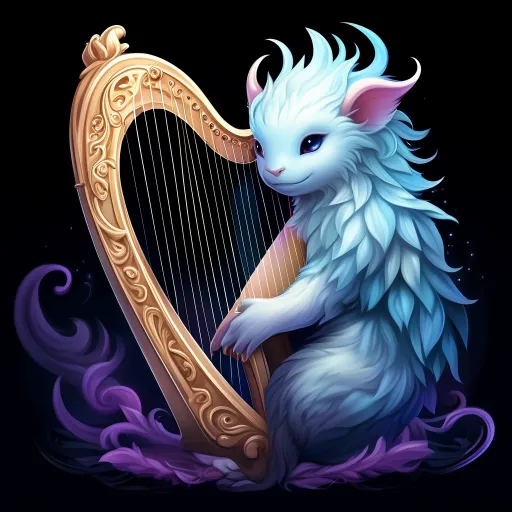

In [46]:
creature('The Silent Song', 'a cute monster holding a harp', 2)

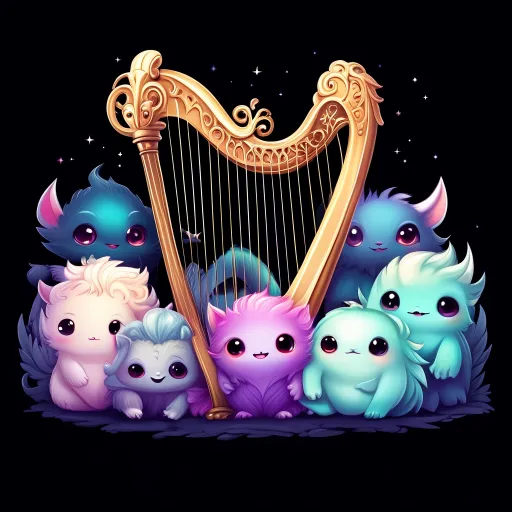

In [144]:
creature('The Silent Orchestra', 'seven cute monsters holding a harp', 2)

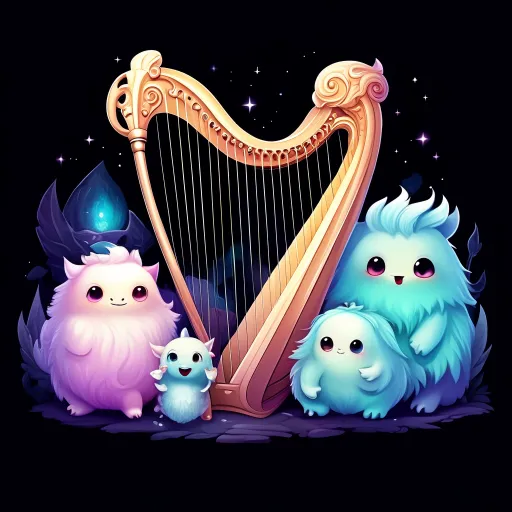

In [158]:
creature('The Silent Quartet', 'seven cute big monsters with a harp', 2)

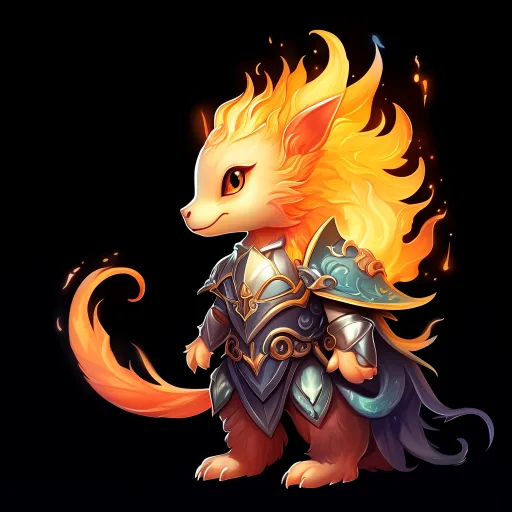

In [93]:
creature('Friend of Metal and Fire', 'a cute fire monster wearing armor, side view', 2)

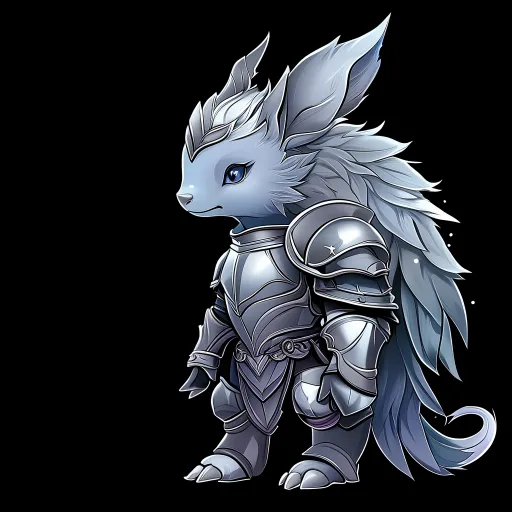

In [92]:
creature('Friend of Metal', 'a cute grey monster wearing armor, side view', 2)

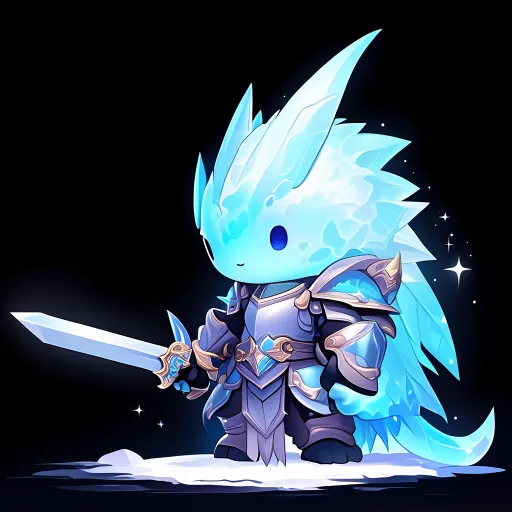

In [98]:
creature('Coldblade', 'a cute icicle monster wearing armor holding a sword, side view', 2)

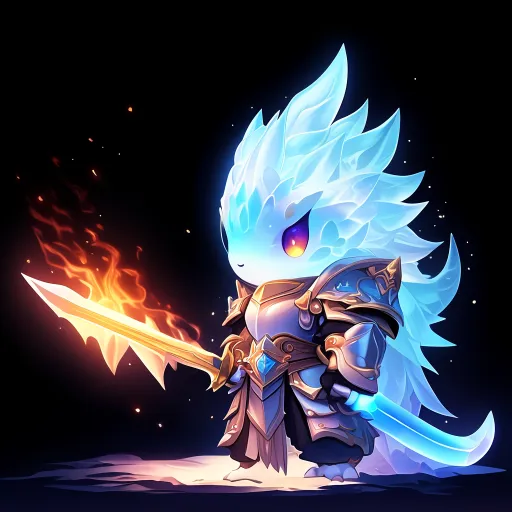

In [340]:
creature('Hotblade', 'a cute icicle monster wearing armor holding a sword, side view, fiery light', 2)

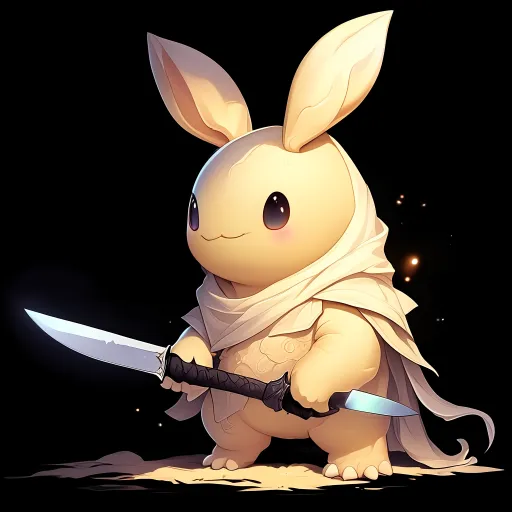

In [173]:
creature('Desert Rabbit', 'a cute sand monster with bunny ears, a knife in both hands, side view', 2)

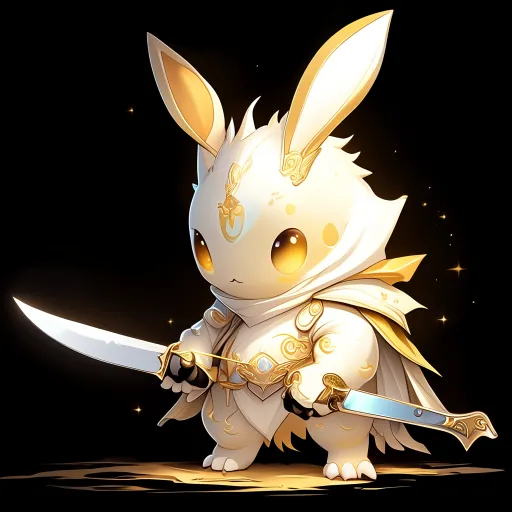

In [41]:
creature('Desert Armadillo', 'a cute sand monster with bunny ears, a knife in both hands, side view, white and gold light', 2)

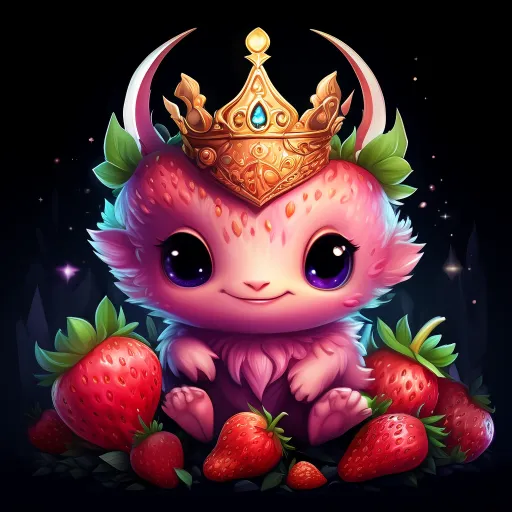

In [8]:
creature('Royal Fruitbearer', 'a small monster wearing a crown with a heap of strawberry', 2)

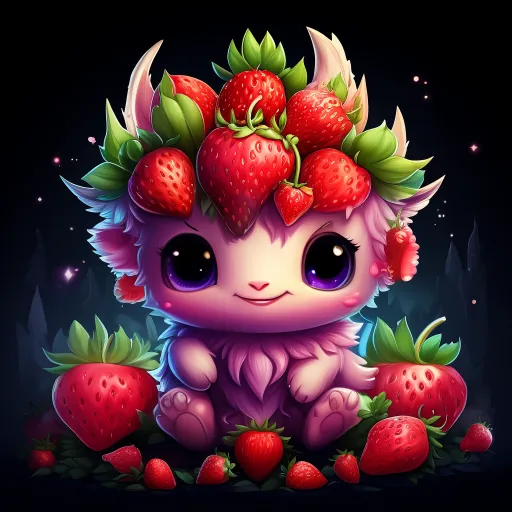

In [123]:
creature('Royal Fruitwearer', 'a small monster wearing a crown of berry with a heap of strawberry', 2)

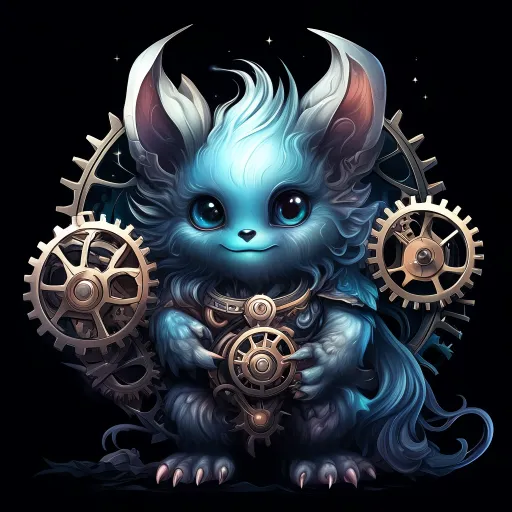

In [199]:
creature('Lord of Gears', 'a monster holding large gears', 2)

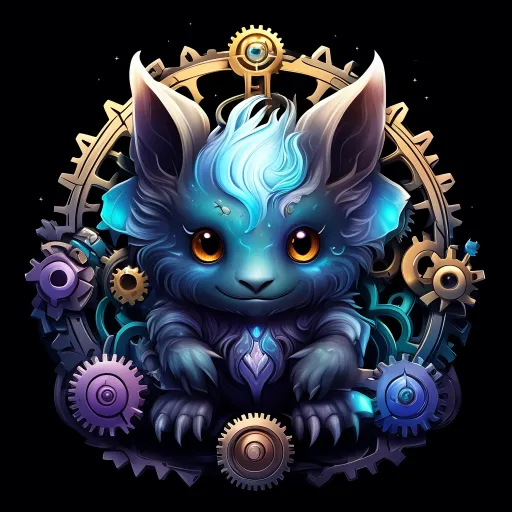

In [41]:
creature('Gear of Lords', 'a monster in front of large gears', 2)

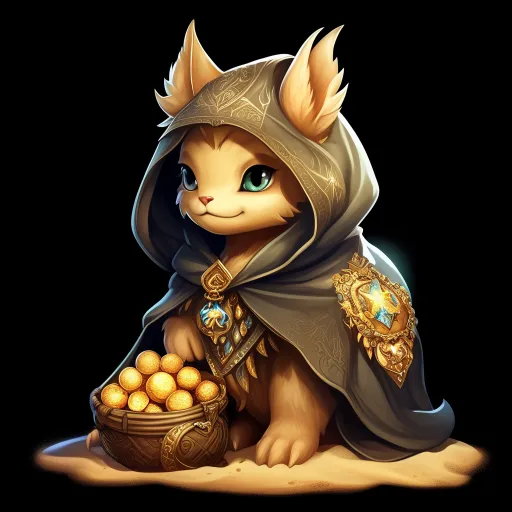

In [ ]:
creature('Pur Lion', 'a furry sand monster with cat ears and a hood, a sack of treasure, side view', 6)

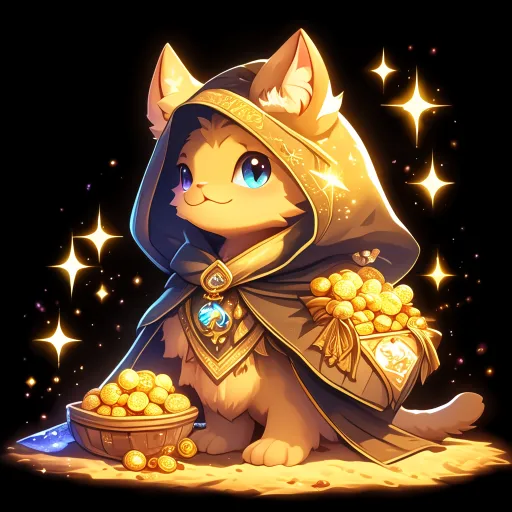

In [462]:
creature('Sir Pur Lion', 'a furry sand monster with cat ears and a hood, a sack of gold and treasure, sparkles, side view', 6)

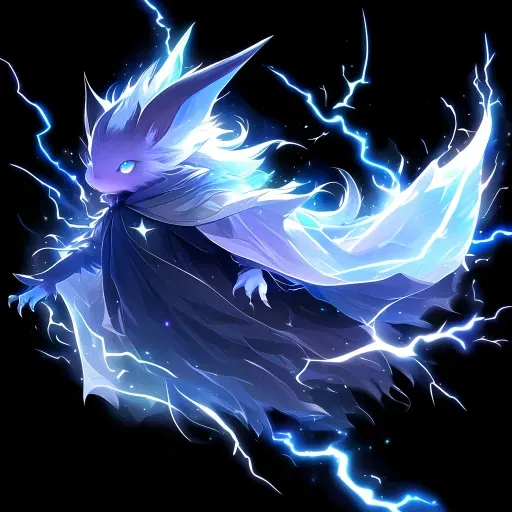

In [197]:
creature('Kit Flash', 'a large monster wearing a cloak flying, chased by lightning bolts', 7, flip=True)

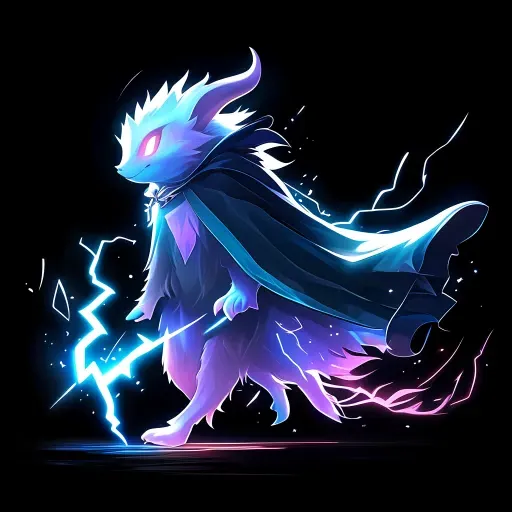

In [160]:
creature('Kit Flash', 'a cute monster wearing a cloak running left with a lightning bolt', 4, flip=True)

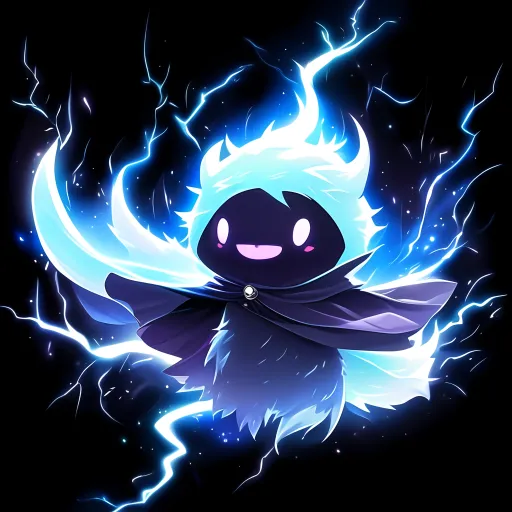

In [53]:
creature('Kit Flash', 'a cute monster wearing a cloak flying in lightning', 7)

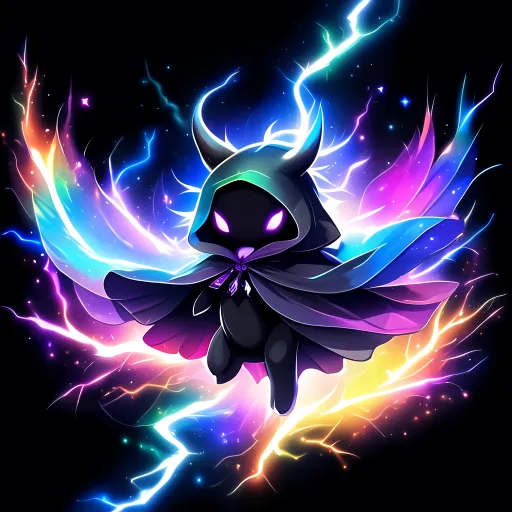

In [296]:
# creature('Kit Storming', 'a fluffy cloud monster in a cloak, electricity, black background', 2)
creature('Kit Storming', 'a cute black monster wearing a cloak flying in rainbow lightning, hands', 7)

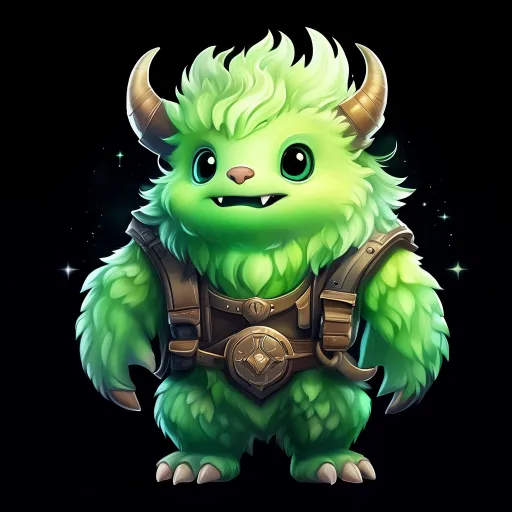

In [117]:
creature('Wayfinder', 'a cute light green monster in explorer gear goes on adventure', 2, flow_dpms_inference_steps=60)

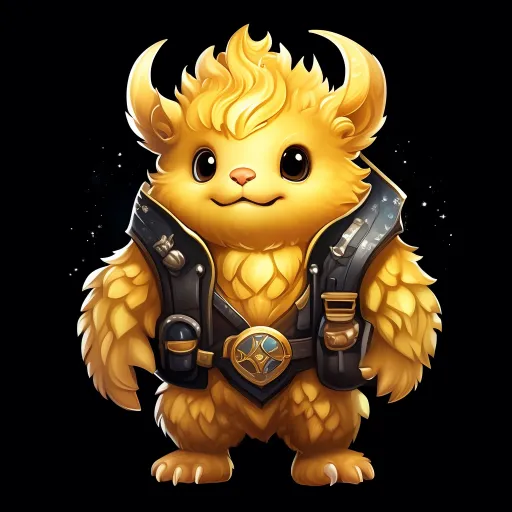

In [118]:
creature('Wayfindest', 'a cute golden monster in explorer gear goes on adventure', 2)

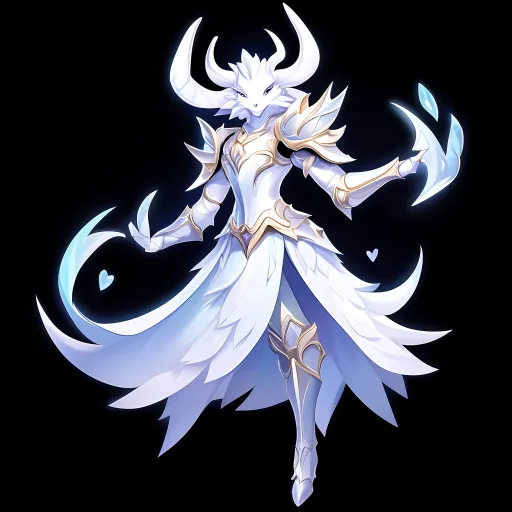

In [161]:
creature('Bayla', 'a white monster in armor skirt dances', 6)

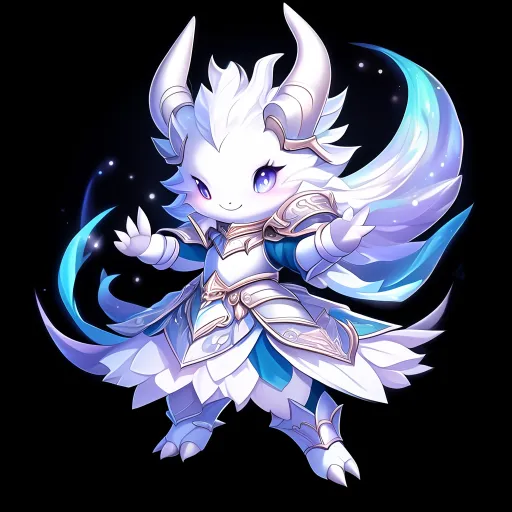

In [ ]:
creature('Bayla', 'a chibi white monster in armor skirt dances', 6)

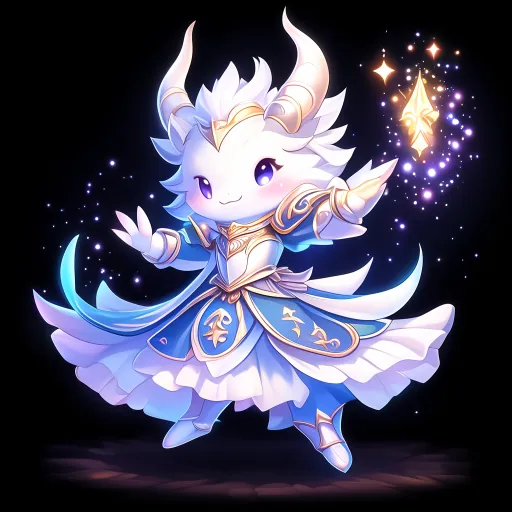

In [382]:
creature('Baylanda', 'a chibi white monster in royal armor skirt dances, magic sparkles', 6)

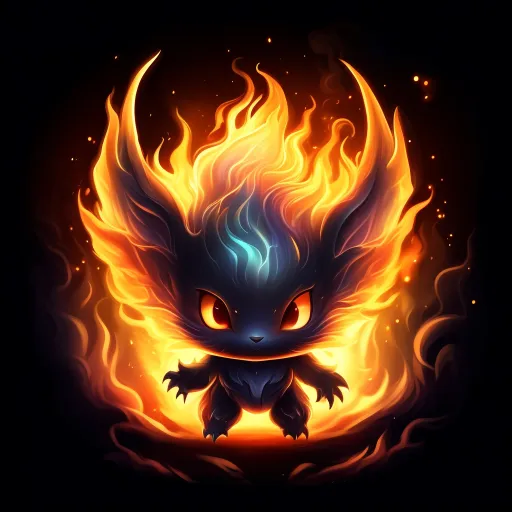

In [198]:
creature('Kevin', 'a monster on fire', 2)

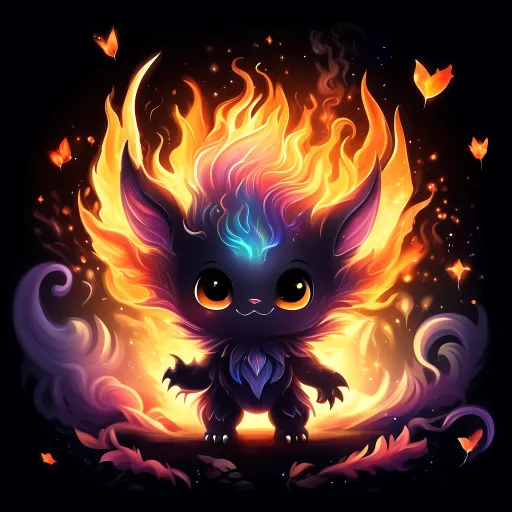

In [459]:
creature('Kevout', 'a monster on fire, fireworks', 2)

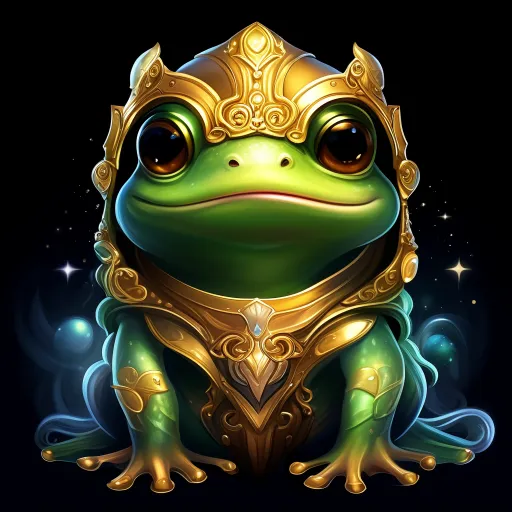

In [197]:
creature('Smiling Admiral', 'a cute frog wearing a helmet of gold', 2)

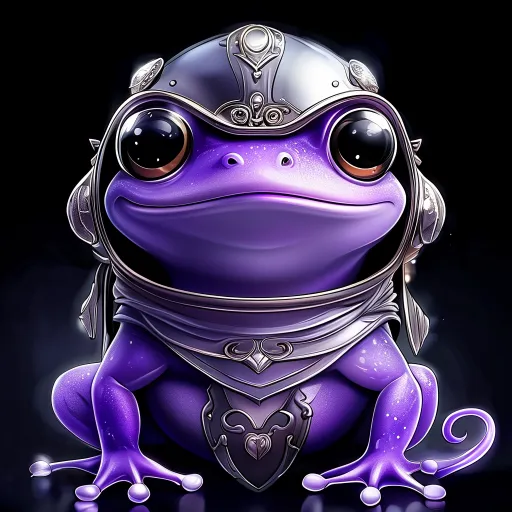

In [196]:
creature('Smiling Pilot', 'a cute purple frog wearing a helmet of silver', 2)

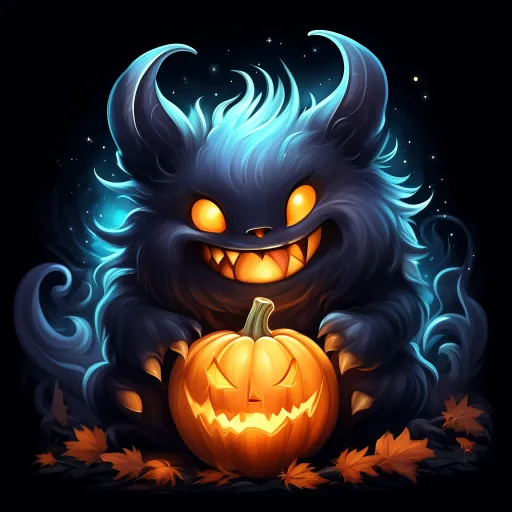

In [ ]:
creature('Kin of Pump', 'a monster laughing at a pumpkin', 2)

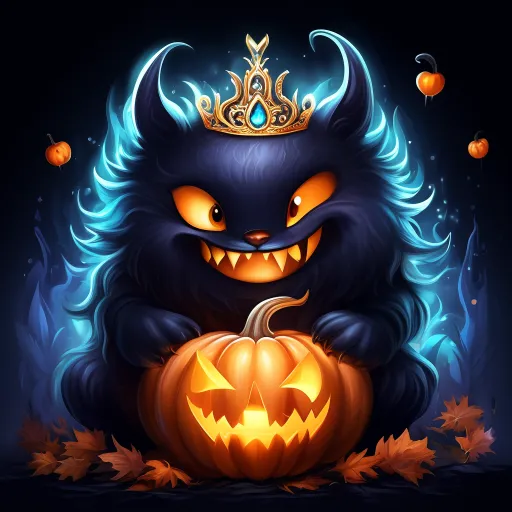

In [68]:
creature('King of Pump', 'a black monster laughing at a pumpkin, tiara', 2)

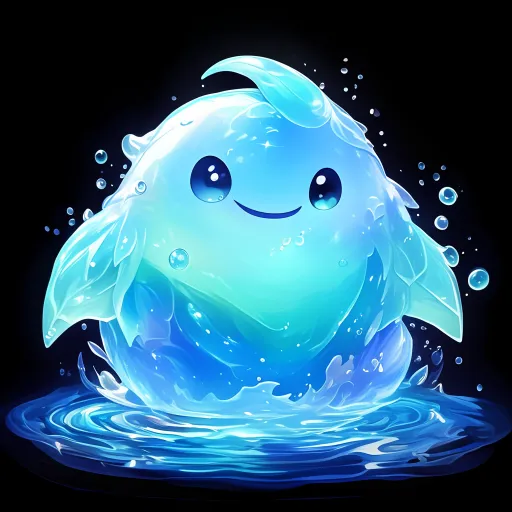

In [62]:
creature('Eighth Swimmer', 'a brave blob monster with a body of translucent water', 3)

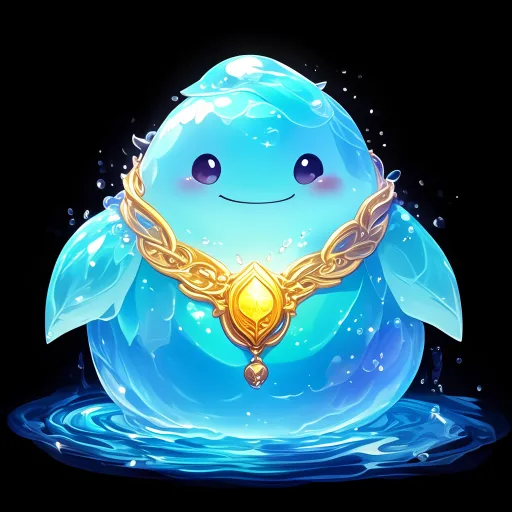

In [66]:
creature('Seventh Swimmer', 'a brave blob monster with a body of translucent water wearing a golden amulet', 3)

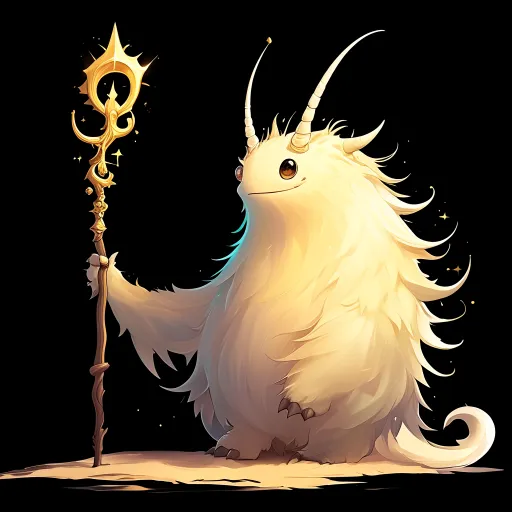

In [101]:
creature("Zaktar Kadoque", 'a cute sand monster with antennae, a staff in hand, side view', 2)

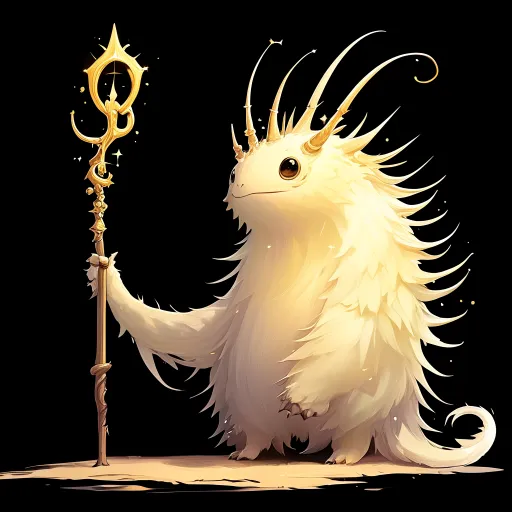

In [78]:
creature("Zaktar Kadoque Karr", 'a cute sand monster with many antennae, a staff in hand, side view', 2)

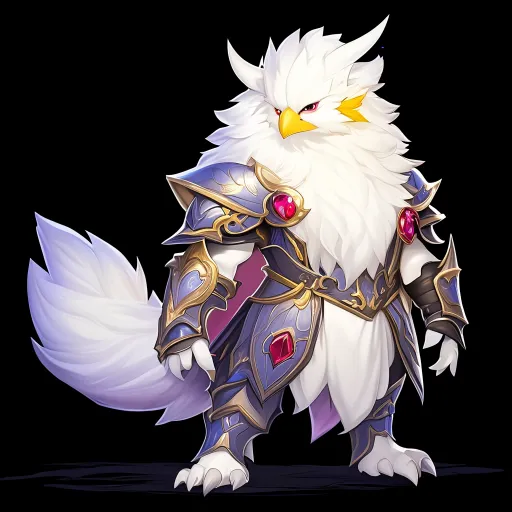

In [ ]:
# creature("Pecquer", "a white furry monster with a short duck's bill wearing ruby armor, full body view", 2)
creature("Pecquer", "a white furry monster with a small yellow beak wearing ruby armor, full body view", 2)

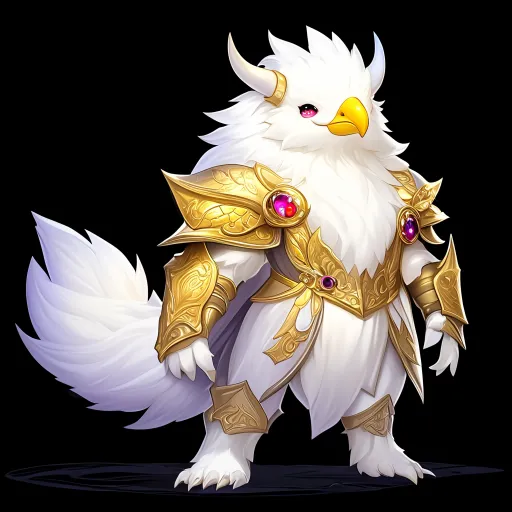

In [ ]:
creature("Le Pecquer", "a white furry monster with a small yellow beak wearing golden ruby armor, full body view", 2)

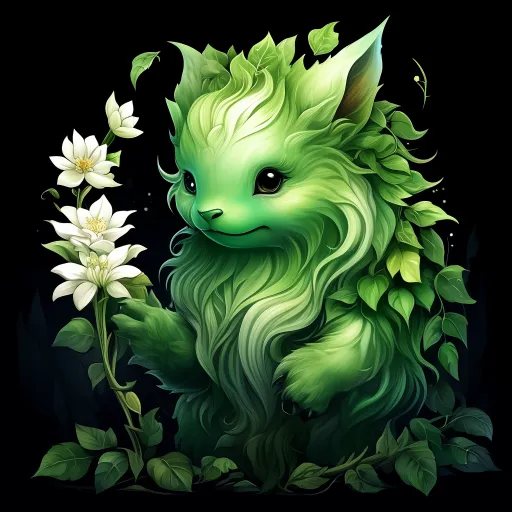

In [46]:
creature("Hedge Lost", "a green forest monster covered in vines holding a white flower", 2)

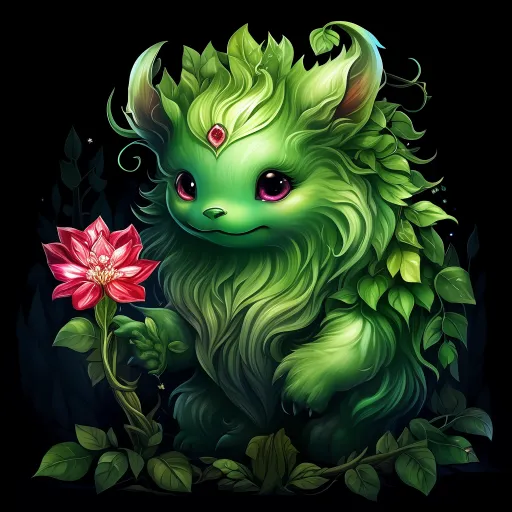

In [54]:
creature("Hedge Found", "a green forest monster covered in vines holding a ruby flower", 2)

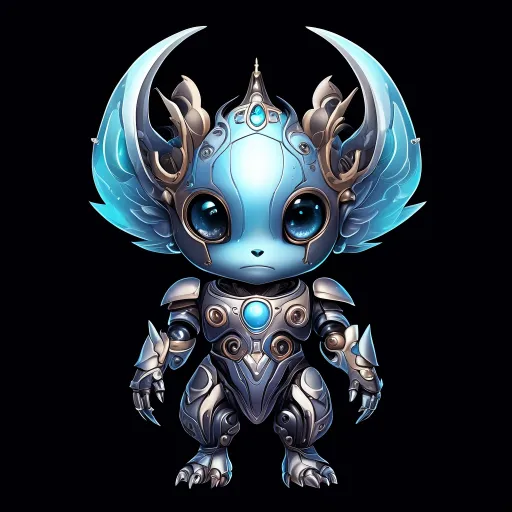

In [80]:
creature("Xaranthian Constructor", "a robot android cyborg", 2, flow_dpms_inference_steps=60)

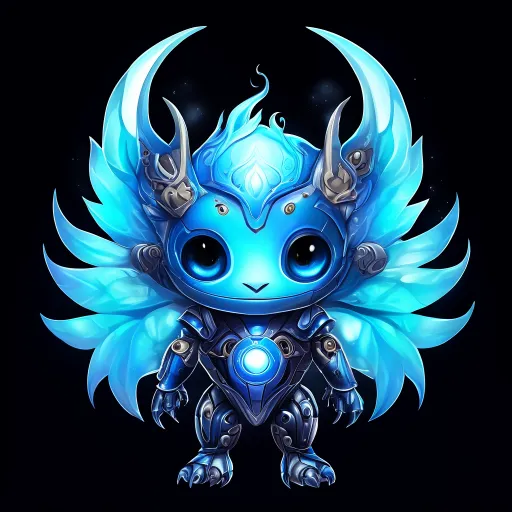

In [79]:
creature("Xaranthian Power Constructor", "a robot android cyborg, blue light", 2, flow_dpms_inference_steps=60)

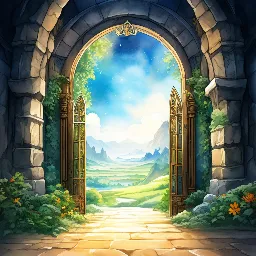

In [ ]:
gen('Retreat', 'a thick dungeon door leading to a sunny landscape', 1)

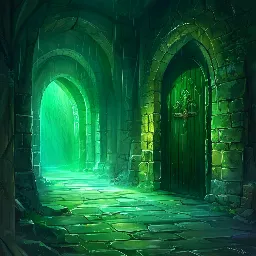

In [94]:
gen('Turn left', 'a damp dungeon corridor with a dark door on the right, greenish light', 1)


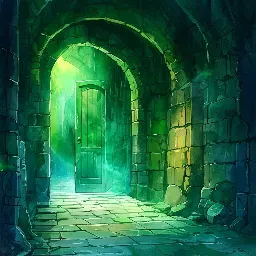

In [93]:
gen('Turn right', 'a damp dungeon corridor with a dark door on the right, greenish light', 10, flip=True)

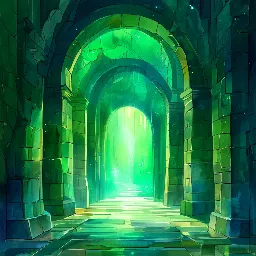

In [98]:
gen('Go straight', 'a damp dungeon corridor leads to a large arch, greenish light', 3)

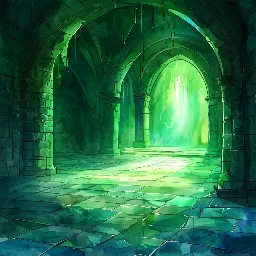

In [101]:
gen('Keep going', 'the floor of a damp dungeon, greenish light', 2)

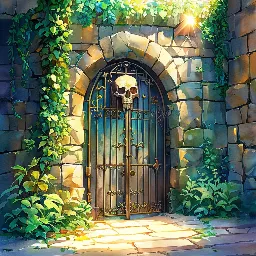

In [297]:
gen('Enter the Dungeon', 'a dungeon wall built from stone, a metal plate gate decorated with a skull, sunshine, plants', 4)

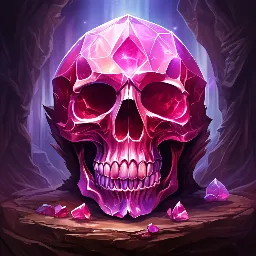

In [3]:
gen('reset', 'a skull carved from ruby', 1)

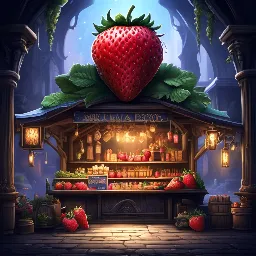

In [364]:
gen('Buy Fruit', 'a market stall with signs, a giant strawberry, dungeon, stonework, darkness, front view', 1, extra='')

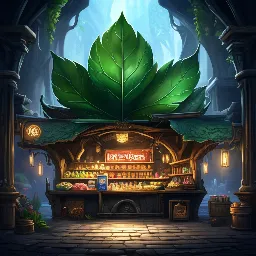

In [371]:
gen('Buy Sapling', 'a market stall with signs, a giant leaf, dungeon, stonework, darkness, front view', 1, extra='')

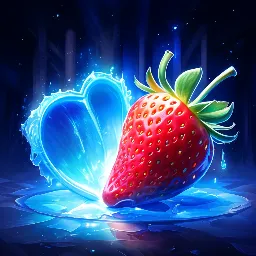

In [ ]:
gen('Eat Fruit', 'a large strawberry halved, blue light', 1)

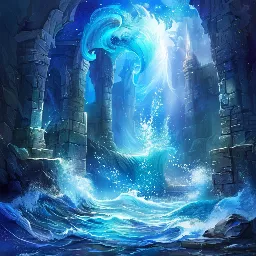

In [59]:
gen('Flood', 'sea, flood, wave, splash, spray, magical blue light, dungeon, stonework, watercolor, darkness', 3, extra="")

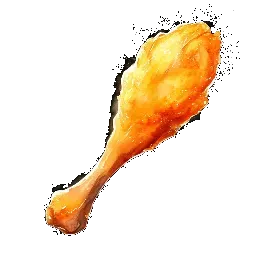

In [489]:
gen('food', 'a fried chicken drumstick, black background', 1, transparent=True)

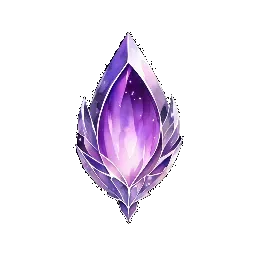

In [304]:
gen('gem', 'one purple gem cut for jewelry, black background', 5, transparent=True)

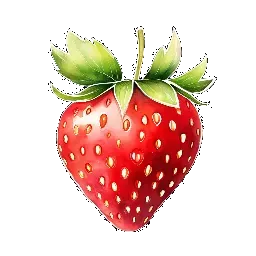

In [303]:
gen('fruit', 'a strawberry, black background', 1, transparent=True)

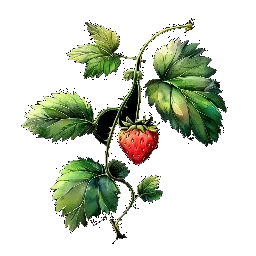

In [69]:
gen('sapling', 'a strawberry plant, black background', 1, transparent=True)

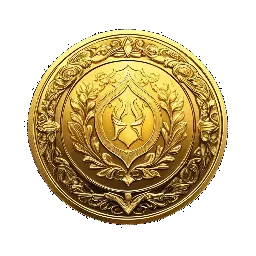

In [628]:
gen('gold', 'a gold coin with a crest engraved, black background', 2, transparent=True)

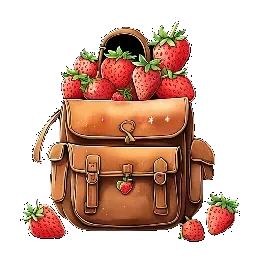

In [89]:
gen('pack', 'a brown backpack filled with strawberries, black background', 3, transparent=True)
# gen('pack', 'a big strawberry in a brown backpack, black background', 7, transparent=True)

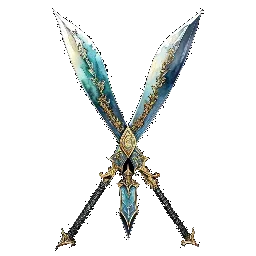

In [ ]:
gen('combat', "two scimitars crossed, black background", 5, transparent=True)

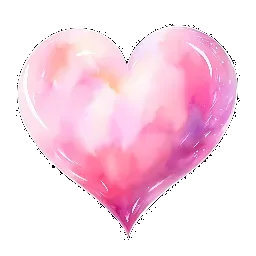

In [3]:
gen('rescue', "smooth pink heart, no background", 7, transparent=True)

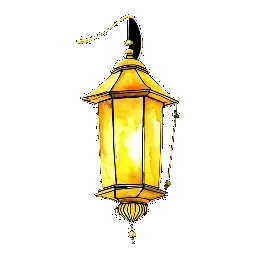

In [ ]:
gen('rescue', "a yellow lantern, black background", 5, transparent=True)

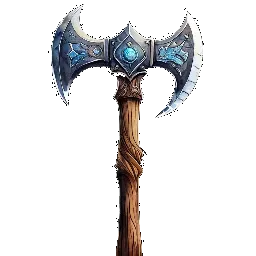

In [490]:
gen('combat', "a heavy wood axe, black background", 4, transparent=True)

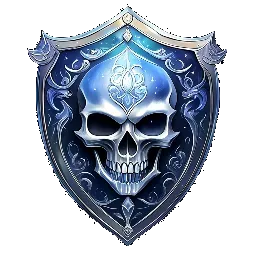

In [49]:
gen('combat', "silver shield in the shape of a skull, black background", 3, transparent=True)

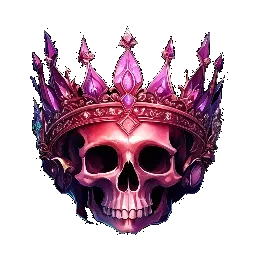

In [27]:
gen('boss', "a ruby crown in the shape of a skull, black background", 3, transparent=True)

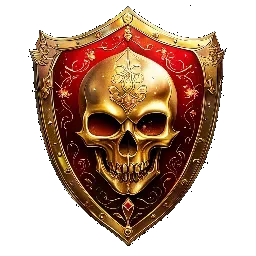

In [51]:
gen('boss', "gold and red shield in the shape of a skull, black background", 3, transparent=True)

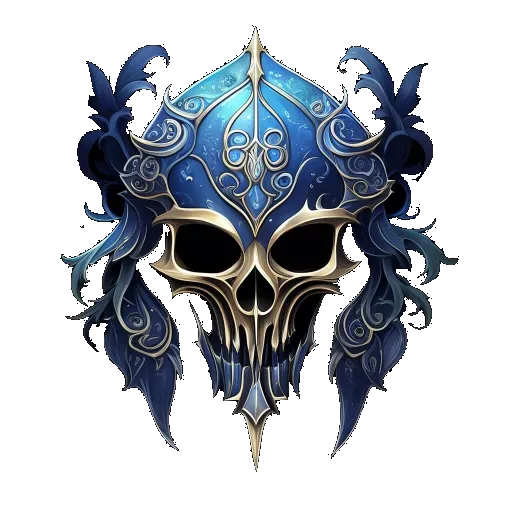

In [31]:
gen('finalboss', "an armor in the shape of a skull, black background", 3, width=512, height=512, transparent=True)

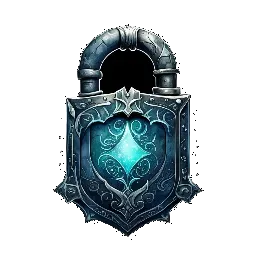

In [577]:
gen('rescue', "an orc padlock, black background", 6, transparent=True)

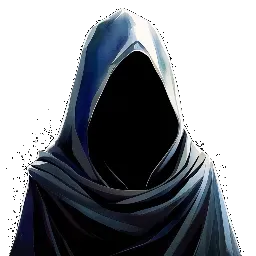

In [620]:
gen('rescue', "a hooded person, only the head is visible, black background", 6, transparent=True)

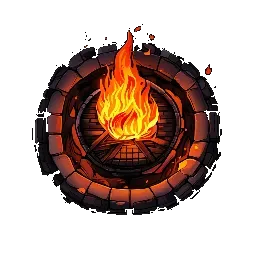

In [543]:
gen('campfire', "firepit, top view, black background", 6, extra='', style="(No style)", transparent=True)

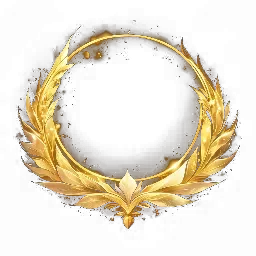

In [111]:
gen('ring', "a circular band of gold", 2, black_transparent=True)

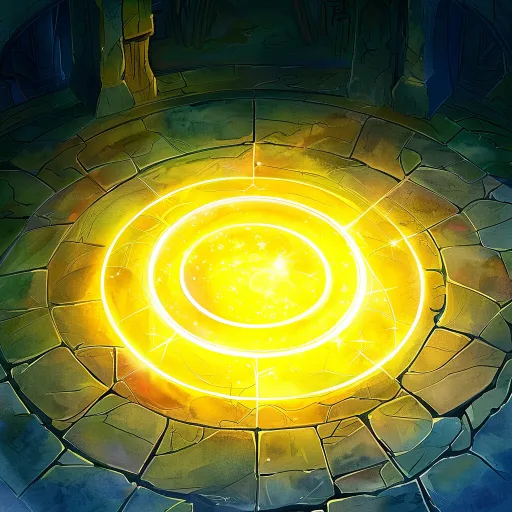

In [85]:
gen('light-ring', "a ring of yellow light on the stone floor, top view", 5, width=512, height=512)

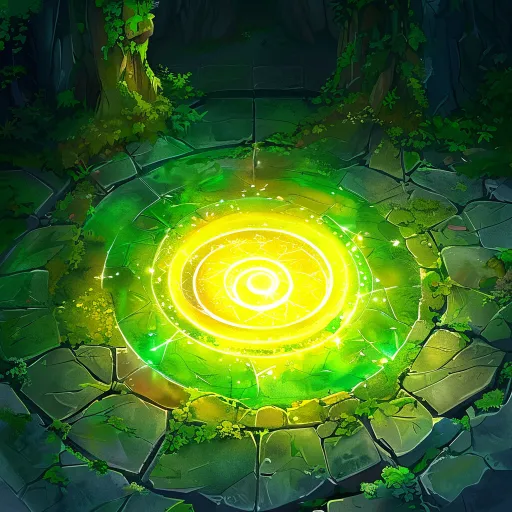

In [346]:
gen('hedge-ring', "a ring of yellow and green light on the stone floor, top view, moss", 5, width=512, height=512)

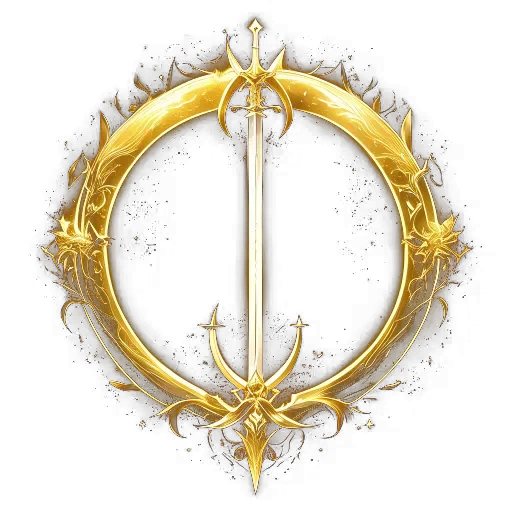

In [31]:
gen('victory1', "a circle of golden swords, black background", 1, width=512, height=512, black_transparent=True, extra="")

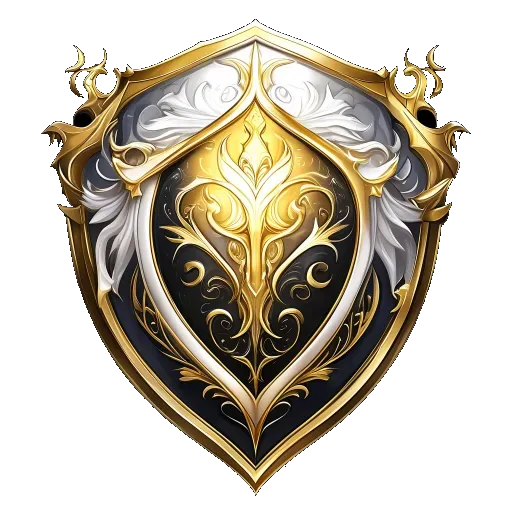

In [57]:
gen('victory2', "a gold and white shield, black background", 6, width=512, height=512, transparent=True, extra="", alpha_mul=2)

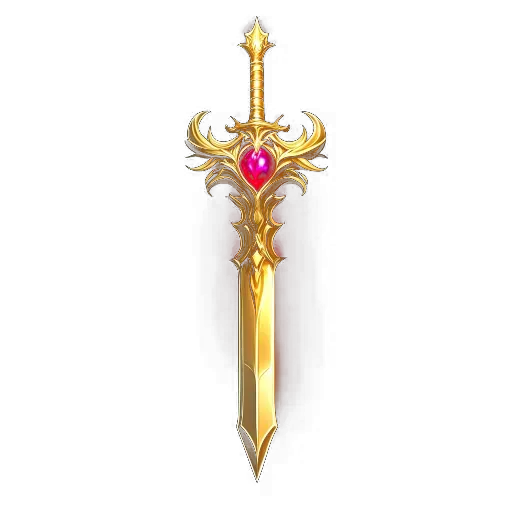

In [45]:
gen('victory3', "a royal golden sword, diagonal, ruby, black background, darkness", 5, width=512, height=512, black_transparent=True, extra="")

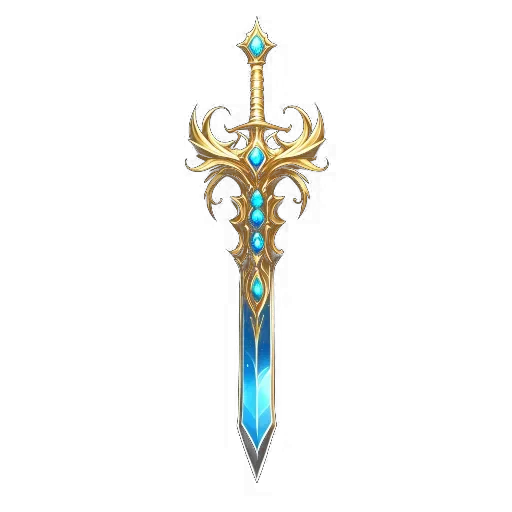

In [27]:
gen('victory4', "a royal golden sword, diagonal, blue gems, black background, darkness", 5, width=512, height=512, black_transparent=True, extra="")

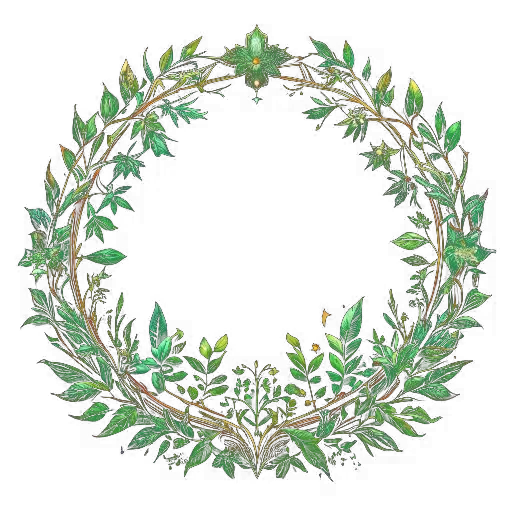

In [351]:
gen('hedge-vines', "a circle of herbs on a black plane, radial vines, symmetrical", 5, width=512, height=512, black_transparent=True)

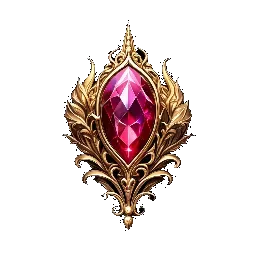

In [254]:
gen('chain', "a ruby set in a simple gold brooch, black background", 2, extra='', transparent=True, use_negative_prompt=True, negative_prompt='complex')

In [90]:
def makeoutline(name):
    im = PIL.Image.open(f"public/images/generated/{name}.webp")
    alpha = im.getchannel("A")
    alpha = alpha.filter(PIL.ImageFilter.GaussianBlur(radius=9))
    alpha = alpha.point(lambda p: p**2)
    result = PIL.Image.new("RGBA", im.size, (0, 0, 0, 0))
    whiteness = PIL.Image.new("RGBA", im.size, (255, 255, 255, 255))
    result.paste(whiteness, mask=alpha)
    alpha = im.getchannel("A")
    alpha = alpha.filter(PIL.ImageFilter.GaussianBlur(radius=4))
    alpha = alpha.point(lambda p: p**2)
    blackness = PIL.Image.new("RGBA", im.size, (0, 0, 0, 255))
    result.paste(blackness, mask=alpha)
    result = PIL.Image.alpha_composite(result, im)
    result.save(f"public/images/generated/{name}-outlined.webp", format='webp')
for name in 'gold gem fruit food combat rescue campfire boss finalboss pack'.split():
    makeoutline(name)

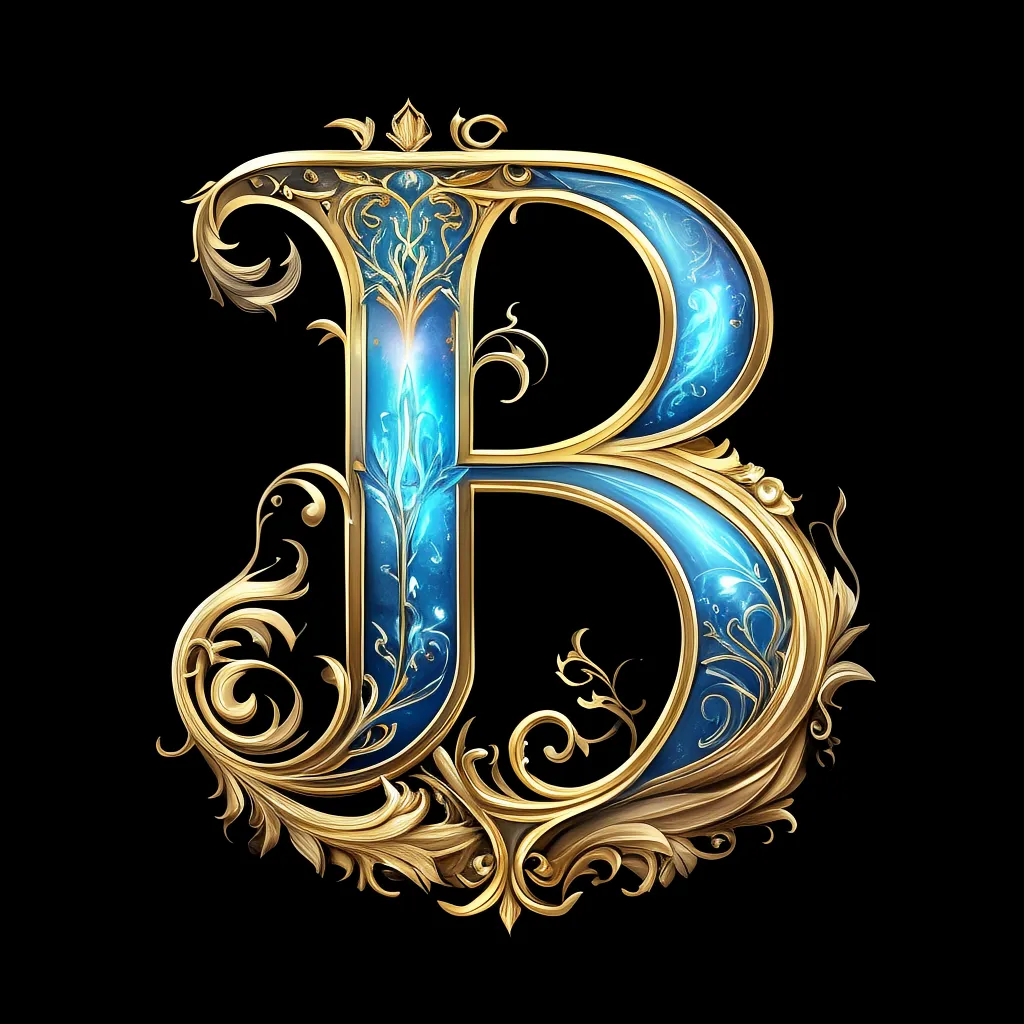

In [275]:
gen('logo', 'a logo resembling the letter B in gold and faint blue, wrought iron, vintage motifs, black background', 18, extra='', width=1024, height=1024, flow_dpms_inference_steps=20, flow_dpms_guidance_scale=7)

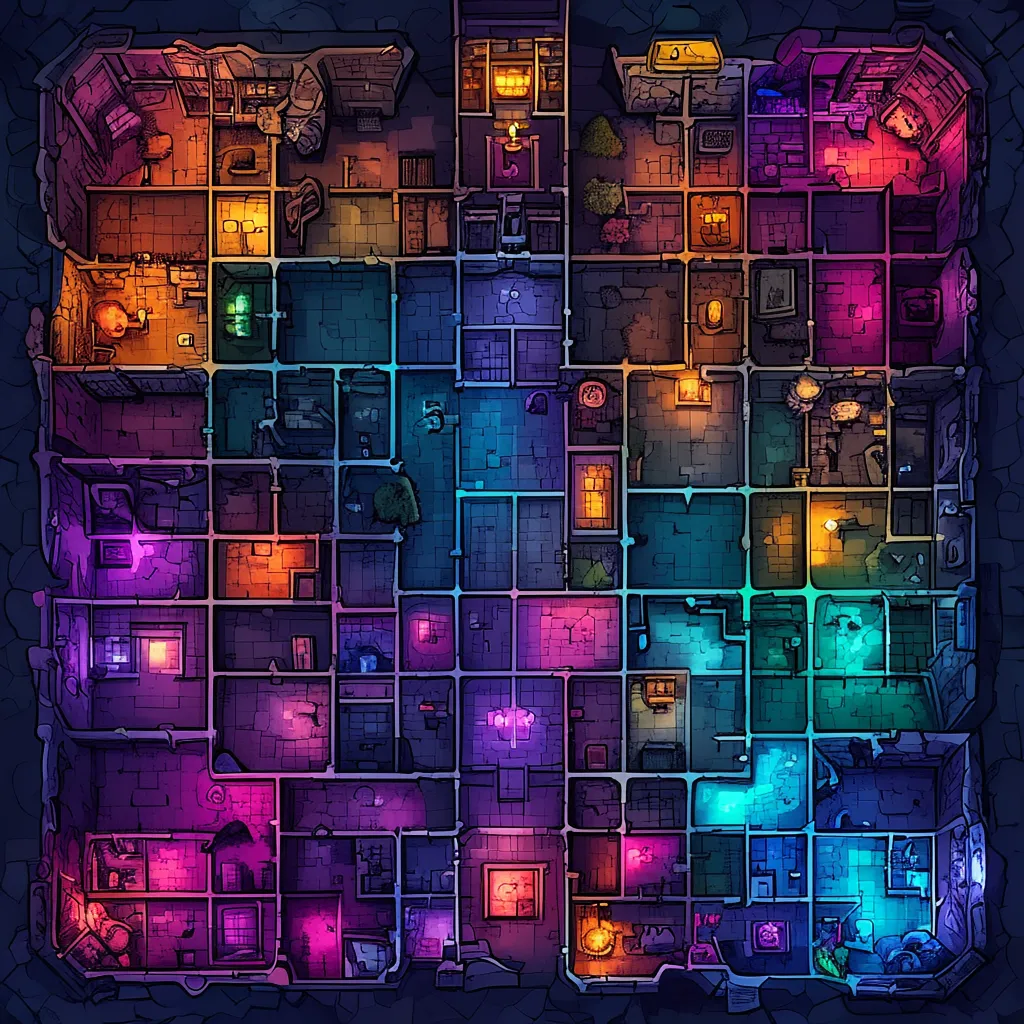

In [56]:
gen('map-preview', 'a dark, colorful grid-based fantasy dungeon map, overhead view of the many rooms of a dungeon, details', 2, extra='', width=1024, height=1024, flow_dpms_inference_steps=40, style="(No style)")

In [43]:
import PIL.ImageEnhance
import PIL.ImageDraw
import PIL.ImageOps

img = PIL.Image.open('public/images/map-raw.png').convert('RGB')
img = PIL.ImageOps.invert(img)
img.save('public/images/generated/map-inverted.png')
style_client = Client("multimodalart/flux-style-shaping")
result = style_client.predict(
		prompt="A colorful fantasy dungeon map. Overhead view. Illuminated rooms.",
		structure_image=handle_file('public/images/generated/map-inverted.png'),
		style_image=handle_file('public/images/generated/map-preview.webp'),
		depth_strength=15,
		style_strength=0.5,
		api_name="/generate_image"
)
shutil.copy(result, "public/images/generated/map-styled.png")
img = PIL.Image.open("public/images/generated/map-styled.png")
img = PIL.ImageEnhance.Color(img).enhance(0.3)
img = PIL.ImageEnhance.Contrast(img).enhance(1.2)
# PIL.ImageDraw.floodfill(img, (10, 10), (0, 0, 0, 0), thresh=20)
img.save('public/images/generated/map.webp', format='webp')
img

Loaded as API: https://multimodalart-flux-style-shaping.hf.space ✔


AppError: You have exceeded your GPU quota (60s requested vs. 1s left). Try again in 21:32:59

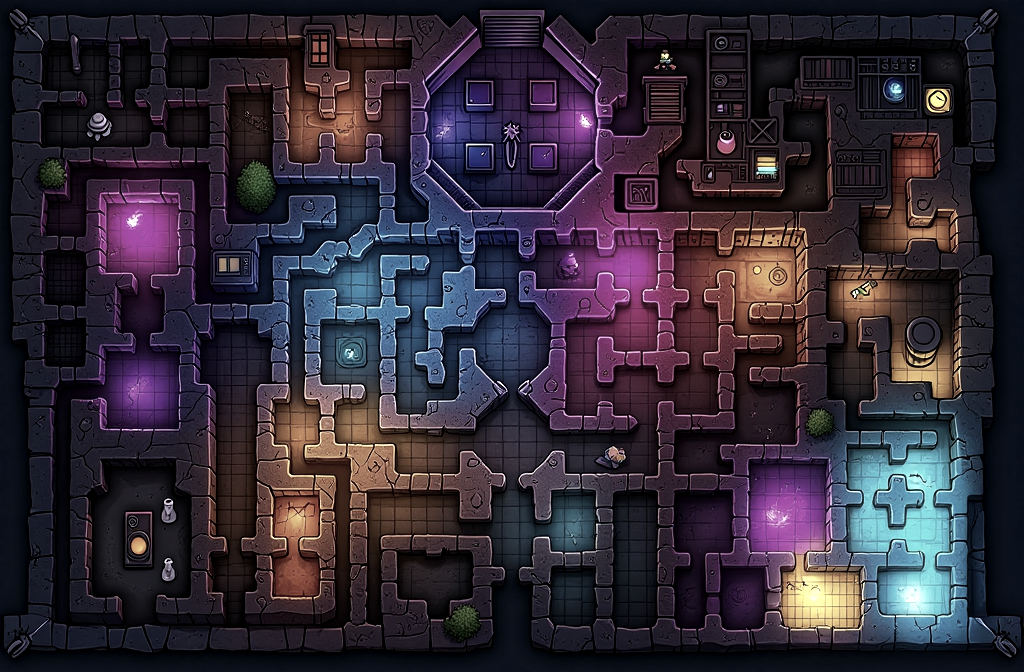

In [287]:
import PIL.ImageEnhance
import PIL.ImageDraw
img = PIL.Image.open("public/images/generated/map-styled.png")#.convert("RGBA")
img = PIL.ImageEnhance.Color(img).enhance(0.3)
img = PIL.ImageEnhance.Contrast(img).enhance(1.2)
# PIL.ImageDraw.floodfill(img, (10, 10), (0, 0, 0, 0), thresh=20)
img.save('public/images/generated/map.webp', format='webp')
img

